In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import operator
import os
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [2]:
text_list = read_text_folder("./datasample/")
print("document number:", len(text_list))

document number: 110


In [3]:
texts = os.listdir('./datasample')
#texts

In [4]:
corpus = []
for text in texts:
    with open('./datasample/{}'.format(text),'r',encoding = 'utf-8') as file:
        corpus.append(file.read())

In [5]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['太平山頂','纜車','凌霄閣','杜莎夫人蠟像館','阿甘蝦餐廳','維多利亞港','幻彩詠香江','張寶仔號','星光大道','迪士尼樂園','燈光秀','海洋公園','廟街夜市','男人街','周星馳','食神','旺角女人街','波鞋街','金魚街','西洋菜南街','昂坪360','纜車','昂坪市集','天壇大佛','水晶車','大澳','大嶼山','蘭桂坊','中環半山扶手電梯','重慶森林','王菲','石板街','砵典乍街','色戒','十月圍城','無間道','龍鳳鬥','泰昌餅家','蘭芳園','絲襪奶茶','中環','嘉咸街壁畫','壁畫','甄子丹','劉德華','追龍','功夫','九龍城寨','塗鴉藝術','天際100','灣仔','金紫荊廣場','時代廣場','鵝頸橋','跑馬','地馬場','尖沙咀','1881 Heritage','1881Heritage','半島酒店','海港城','女人街','朗豪街','旺角','東湧','東薈城','怪獸大廈','春秧街市場','春秧街','鴨寮街','美荷樓','黃大仙祠','彩虹邨','大澳漁村','南丫島','赤柱市集','美利樓','鴨靈號','澳門','九龍','奶油豬仔包','花園街','流沙包','炭烤燒肉','太平山夜景','觀景台','阿甘蝦','豬扒包','生煎包','恆香老婆餅','大館','檀島咖啡','甘牌燒鵝','宜必思酒店','蓮香居','港幣','來回機票','電子港簽','台胞證','中環','銅鑼灣','新界','叮叮車','上環','金鐘','灣仔','天后','的士','八達通卡','油麻地','九龍尖沙咀','紅勘','李嘉欣','The One百貨','TheOne百貨','THEONE百貨','theone百貨','K11商場','龍城大藥房','翠華餐廳','至潮魚蛋','太子','雞仔餅','紅豆燒餅','奇趣餅家','冰火菠蘿油','金華冰廳','燒汁釀茄子','菠蘿油','鴨肉火肉飯','太平山','阿甘正傳','郭富城','阿甘蝦美式餐廳','沾仔記雲吞麵','海山樓','192層蛋塔','近郊','巧克力博物館','黃竹坑站','食神','禮頓道站','跑馬地總站','西港城','生記粥品','新記車仔麵','鵝頸橋打小人','沙田賽馬場','黃大仙','黃大仙廟','深水埗站','深水埗','天星小輪','天星碼頭','欣澳站','迪士尼','赤柱','西貢','地質公園','全記海鮮','松記車仔麵','長洲','張保仔號','張保仔洞','興樂菜館','新照記魚丸','超人氣','香港旅遊發展局','旅遊發展局','網路','熱搜','精選','分享文','選出','自由行','彙整','省錢','快速通關','住宿地','路線','風情','相當','龐大','一律','開始','插座','天王','寫','哈','車廂','包廂','TOP','Top','大量','排隊','詳細','香港','paula','CDATA','googleadclientcapub8969488696235010','33642280','googleadslot8177660368','googleadwidth336','googleadheight280CDATA','netsunlight0324CM199229823','googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250','套餐', '看起來','來的及','搭地鐵','Day','day','DAY','起飛前','港幣','懷舊','費用','多數','那先來','三天','解釋','費用','機票','好','來','這地區','此文','你','住','別忘記','每天','好戲','滿快','懂','誤認','一站','划算','如果','每天','畢竟','最好','都爹利街','渡輪','最','西邊','東邊','南邊','北邊','分店','搭乘','精品','從','不是','女友','接駁','趴','捆','這萬象','不是','通','八達通','用','登機','女生','或許','免稅','男性','驚覺','依賴','站名','用','眾人','右上角','擷取','分享','不過','遊客','延伸','閱讀','為上','因為','看','提供','只要','航班','篇','還是','朋友','主要','很多','不能','交通','標準','雙人','客房','客房','優惠','手軟','面積'])

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/yj/b2sj8k396ts1dld08589ctwc0000gn/T/jieba.cache
Loading model cost 0.622 seconds.
Prefix dict has been built succesfully.


In [6]:
stopwords = [ '標準','雙人','客房','客房','優惠','，','竟然','完美','旅客','能力','來的及','成人','幾站','非吃不可','緊張','的','應該', '會','錯過','時間','根本','不曉得','面積','手軟','就','都','選擇', '套餐', '看起來','...','多麼','甚至', '就是','而且', '一樣','當然','體驗','只是','.','特色','這裡','下車','走', '、','?','!',',','在','她','厲害','Commonroom','Day','day','DAY','全日','失敗','但','少','多','印象','近距離','除了','美食','台灣','市區','？', '唷','可以','很','！','，','。','的', '是', '在', '有', '就', '獲', '不' , '會', '若', '而', '這', '該', 'ETtoday', '被' , '那個' , '...' ,'klook','Klook','kkday','Kkday','大','便宜','票券','票價','門票','推薦','地圖','啊','吧','大概','好像','忘記','香港','文章','波比','那些','攻略','答案','這些','或許','要馬','了','啦','還有','哪裡','哪些','大概','或者','根據','都','整理','PDF','超人氣','哪','旅遊景點','景點','旅遊','發展','諸多','程度','排名','熱搜','一定','以及','亦','以','與','精選','分享文','選出','必去','必買','買','搶先','最','更','自由行','附上','所有','去','到','抵達','玩','出來','行程','比價','安排','大家','優惠','事項','搶','方便','這份','拿','一次','一起','趕緊','彙整','百萬','我們','省錢','快速通關','處','世界','住宿地','住宿','地','地方','於','活動','著','含','更新','懶人包','私房','也','超詳細','規劃','又','這也','用品','路線','碧海','非常','風情','相當','龐大','一律','開始','插座','天王','寫','哈','機票','大補帖','總','顯示','目前','幾次', '車', '電子港簽','正式', '怎樣','車廂','搞定', '窺','包廂','無','和','游','TOP','Top','大量','排隊','往','狠','一日','大多','短短','回顧','完善','之旅','幾家','路程','這樣','硬性','詳細','超','香港','paula','CDATA','googleadclientcapub8969488696235010','33642280','googleadslot8177660368','googleadwidth336','googleadheight280CDATA','netsunlight0324CM199229823','googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250','交通工具','大部分','預辦','收費','跟','說','網頁','血拼','機場','免費','確認','真的','人','上手','搭地鐵','起飛前','港幣','懷舊','費用','多數','那先來','三天','解釋','費用','機票','好','來','這地區','此文','你','住','別忘記','每天','好戲','滿快','懂','誤認','一站','划算','如果','每天','畢竟','最好','最','西邊','東邊','南邊','北邊','分店','搭乘','精品','從','不是','女友','接駁','趴','捆','這萬象','不是','通','用','登機','女生','或許','免稅','男性','驚覺','依賴','站名','用','眾人','右上角','擷取','分享','不過','遊客','延伸','閱讀','為上','因為','看','提供','只要','航班','篇','還是','朋友','主要','很多','不能','交通']
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

In [7]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#sorted(list(doc_word_frequency[7].items()) , key = lambda x: x[1] , reverse=True)[0:20] # 顯示第一篇文章的部份詞彙與對應詞頻
#for i in range (len(text_list)):
   # l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
#print(l_d)

In [8]:
for i in range (len(text_list)):
    l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
print(l_d)


[('我', 65), ('深水埗', 62), ('呢', 52), ('旅館', 45), ('Wontonmeen', 44), ('這個', 40), ('一個', 31), ('話', 25), ('唐樓', 24), ('為', 23), ('做', 21), ('知道', 20), ('自己', 20), ('阿金', 18), ('老', 18), ('沒', 18), ('麵', 17), ('他', 17), ('對', 17), ('這麼', 17), ('什麼', 17), ('之', 17), ('闆', 16), ('想', 16), ('一家', 16), ('一些', 16), ('籠屋', 15), ('設計', 15), ('上', 15), ('娘', 15), ('要', 14), ('後', 14), ('這家', 13), ('Pat', 13), ('把', 13), ('吃', 13), ('^', 12), ('模型', 12), ('電影', 11), ('所以', 11), ('空間', 11), ('招牌', 11), ('細蓉', 10), ('咖啡', 10), ('看到', 10), ('照片', 10), ('這是', 10), ('他們', 10), ('讓', 10), ('狂', 10), ('旅', 10), ('東西', 9), ('錢', 9), ('不會', 9), ('感覺', 9), ('社區', 9), ('雲', 8), ('吞', 8), ('經典', 8), ('音樂', 8), ('相信', 8), ('感受', 8), ('假如', 8), ('加上', 8), ('超級', 8), ('哈哈', 8), ('再', 8), ('愛', 8), ('這種', 8), ('房間', 8), ('間', 8), ('介紹', 7), ('故事', 7), ('一下', 7), ('那', 7), ('Hostel', 7), ('時候', 7), ('生活', 7), ('也許', 7), ('住客', 7), ('製', 7), ('霓虹', 6), ('廳', 6), ('雖然', 6), ('這張', 6), ('事', 6), ('位置', 6), ('隨性', 6),

In [9]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [10]:
# 查詢斷完詞後的 list 
corpus_cut = [jieba.lcut(t) for t in corpus]
corpus_cut

[['當然',
  '，',
  '大部分',
  '來',
  '香港',
  '的',
  '朋友',
  '。',
  '女性',
  '多半',
  '來',
  '血拼',
  '的',
  '畢竟',
  '是',
  '免稅',
  '天堂',
  '，',
  '精品',
  '品牌',
  '的',
  '價位',
  '真的',
  '差滿',
  '多',
  '的',
  '男性',
  '，',
  '不是',
  '陪伴',
  '女友',
  '，',
  '就是',
  '來',
  '享受',
  '美食',
  '啦',
  '。',
  '這萬象',
  '之',
  '都',
  '的',
  '三天',
  '或是',
  '二天',
  '度假',
  '，',
  '都',
  '得',
  '好好',
  '運',
  '用到',
  '香港',
  '便利',
  '交通工具',
  '啊',
  '！',
  'CDATA',
  'googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250',
  'CDATA',
  '所以',
  '接下',
  '來介紹',
  '，',
  '最好',
  '的',
  '交通工具',
  '。',
  'CDATA',
  'googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250',
  'CDATA',
  '沒有',
  '錯',
  '，',
  '傳說',
  '中',
  '的',
  '十一',
  '路公車',
  '眾人',
  '圍毆',
  '。',
  '。',
  '。',

#文章數量要夠多才能用
#sorted_d = sorted(doc_word_frequency.items(), key=operator.itemgetter(1), reverse = True)

檢查字典
利用coshow

In [11]:
##a = [[1, 2], [3, 4]] 大概是這概念
cut = [i for sublist in corpus_cut for i in sublist]
new_dic = []
for i in range(len(cut) - 1):
    assemble_word = cut[i]+cut[i+1]
    new_dic.append(assemble_word)
    print(cut[i]+cut[i+1])
#    print(assemble_word)
#    #print(new_dic)

當然，
，大部分
大部分來
來香港
香港的
的朋友
朋友。
。女性
女性多半
多半來
來血拼
血拼的
的畢竟
畢竟是
是免稅
免稅天堂
天堂，
，精品
精品品牌
品牌的
的價位
價位真的
真的差滿
差滿多
多的
的男性
男性，
，不是
不是陪伴
陪伴女友
女友，
，就是
就是來
來享受
享受美食
美食啦
啦。
。這萬象
這萬象之
之都
都的
的三天
三天或是
或是二天
二天度假
度假，
，都
都得
得好好
好好運
運用到
用到香港
香港便利
便利交通工具
交通工具啊
啊！
！CDATA
CDATAgoogleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250
googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250CDATA
CDATA所以
所以接下
接下來介紹
來介紹，
，最好
最好的
的交通工具
交通工具。
。CDATA
CDATAgoogleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250
googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300google

上環下車
下車，
，去
去太平山
太平山最順
最順文章
文章攻略
攻略香港
香港2019
2019電車
電車全景
全景遊
遊套票
套票！
！這樣
這樣遊港島
遊港島輕
輕鬆
鬆又
又方便
方便，
，有小有
有小有老
老更
更適合
適合這
這行程
行程太平山頂
太平山頂纜車
纜車快速通關
快速通關券
券五六日
五六日在
在台
台買
買好
好優惠
優惠價貼
價貼心
心提醒
提醒請
請買
買單程
單程！
！下山
下山在
在上面
上面搭
搭小巴
小巴1
1號
號下山
下山最快
最快太平山頂
太平山頂纜車
纜車快速通關
快速通關券
券周一
周一周四
周四在
在台
台買
買好
好優惠
優惠價貼
價貼心
心提醒
提醒請
請買
買單程
單程！
！下山
下山在
在上面
上面搭
搭小巴
小巴1
1號
號下山
下山最快
最快文章
文章攻略
攻略香港
香港2019
2019年
年香港
香港太平山
太平山的
的快速
快速上
上下山
下山攻略
攻略！
！這個
這個教
教很
很多次
多次了
了！
！真的
真的要
要用心看
用心看這次
這次還附
還附影片
影片景點配
景點配美食
美食可以
可以來
來試試
試試！
！這驗體
這驗體很
很不錯
不錯香港
香港太平山頂
太平山頂美食
美食阿甘蝦美式餐廳
阿甘蝦美式餐廳餐券
餐券在
在台
台買
買好
好優惠
優惠價建議
價建議這吃景觀
這吃景觀更好
更好香港
香港天際100
天際100Caf100
Caf100觀景餐
觀景餐廳
廳套票
套票在
在台
台買
買好
好優惠
優惠價建議
價建議美
美饌
饌套票
套票很
很超值
超值！
！黃
黃昏
昏在
在上
上來
來透明
透明巴士
巴士遊
遊香港
香港香港
香港水晶
水晶巴士
巴士餐廳
餐廳體驗
體驗在
在台
台買
買好
好優惠
優惠價貼
價貼心
心提醒
提醒吃素
吃素的
的人
人記得
記得備
備註
註住宿
住宿推上
推上環
環灣仔
灣仔銅鑼灣
銅鑼灣尖
尖沙嘴
沙嘴可以
可以的
的話
話住
住一晚
一晚迪士尼
迪士尼灣仔
灣仔站
站木棉花
木棉花酒店
酒店阿千
阿千2018
2018年
年11
11月
月入住
入住查看
查看飯店
飯店價位
價位力推
力推這樣
這樣價能
價能住
住到
到這麼
這麼大間
大間超值
超值迪士尼
迪士尼站
站香港
香港迪士尼
迪士尼探索
探索家
家酒店
酒店阿千
阿千2018
2018

大只要
只要你
你來
來三夜
三夜兩夜
兩夜都
都必買
必買KK
KKday
day最
最超值
超值香港
香港套票
套票這張
這張套票
套票的
的用法
用法這
這一年
一年內
內最
最多
多人問
人問的
的1
1我刷
我刷了
了快線
快線後
後，
，地鐵
地鐵就
就倒數
倒數72
72小時
小時了
了嗎
嗎？
？刷
刷快線
快線不會
不會啓
啓算
算，
，是
是以
以你
你刷
刷了
了地鐵任
地鐵任一站
一站開始
開始才
才會
會倒數
倒數72
72小時
小時2
2這張
這張卡
卡可以
可以搭
搭叮叮車
叮叮車渡輪
渡輪還有
還有其他
其他八達通
八達通的
的消費
消費？
？這張
這張卡
卡在
在你
你啓
啓用
用72
72小時
小時內
內可以
可以加值
加值，
，加值
加值後
後你
你就
就可以
可以搭
搭叮叮車
叮叮車渡輪
渡輪和
和消費
消費3
3請問
請問我
我買
買這
這套票
套票還要
還要再
再買
買一般
一般的
的八達通
八達通嗎
嗎？
？不用
不用了
了！
！72
72小時
小時內
內有
有加值
加值後
後卡內
卡內有
有錢
錢就
就可以
可以在
在第四天
第四天第五天
第五天第
第N
N天內
天內使用
使用！
！472
472小時
小時可以
可以免費
免費搭
搭那些
那些可
可搭
搭這些
這些地鐵
地鐵MRT
MRT輕鐵
輕鐵和
和港
港鐵
鐵巴士
巴士新界
新界西北
西北沒寫
沒寫到
到的
的交通工具
交通工具就是
就是加值
加值後
後才能
才能扣款
扣款去
去搭
搭5
5單次
單次快線
快線我
我可以
可以自由
自由選在
選在去
去程用
程用或
或回程
回程用
用嗎
嗎？
？可以
可以！
！去
去回任
回任你
你選
選6
6這個
這個單次
單次我
我用
用在
在回程
回程快線
快線使用
使用可以
可以用
用預辦
預辦登機
登機嗎
嗎？
？可以
可以，
，進
進預辦
預辦登機
登機刷
刷這張
這張套票
套票卡
卡即可
即可7
7我
我可以
可以在
在香港
香港預辦
預辦登機
登機後
後！
！最後在
最後在九龍
九龍站
站或
或青衣
青衣站上
站上快線
快線嗎
嗎？
？可以
可以！
！這
這套票
套票的
的彈性
彈性就是
就是這麼
這麼大
大8
8這個
這個套票
套票的
的快線
快線，
，我
我一樣
一樣可以
可以坐
坐免費
免費的
的接駁
接駁巴

No.6香港
香港自由行
自由行美食
美食2019
2019米其林
米其林清單
清單來
來香港
香港自由行
自由行就是
就是要
要大吃大喝
大吃大喝！
！飲茶
飲茶燒鵝燒
燒鵝燒臘煲
臘煲仔飯
仔飯雲
雲吞
吞麵
麵乾
乾炒
炒牛河生
牛河生滾
滾粥
粥避風塘
避風塘炒
炒蟹
蟹咖哩
咖哩魚蛋
魚蛋雞蛋
雞蛋仔波蘿
仔波蘿油港
油港式
式奶茶
奶茶等
等，
，各式
各式各樣
各樣的
的經典
經典美食
美食，
，是
是讓
讓波比
波比一
一再造
再造訪
訪香港
香港的
的動力
動力。
。其中
其中坤
坤記煲
記煲仔飯
仔飯橋底
橋底辣蟹
辣蟹九記
九記牛腩
牛腩一點
一點心勝香
心勝香園華星
園華星冰室
冰室麥文記
麥文記麵
麵家
家，
，是
是波比
波比認為
認為錯
錯過會
過會大大
大大後
後悔
悔的
的必
必吃
吃香港
香港美食
美食，
，它們
它們的
的味道
味道真的
真的太強
太強了
了，
，沒吃過
沒吃過的
的人
人根本
根本無法
無法想像
想像。
。另外
另外下面
下面這篇
這篇超狂
超狂攻略
攻略，
，你們
你們一定
一定一定
一定要
要看
看，
，沒看
沒看真的
真的會
會超後悔
超後悔除了
除了2019
2019年
年最新
最新米其林
米其林名
名單外
單外，
，還有
還有60
60家
家香港
香港必吃
必吃美食
美食清單
清單依
依菜色
菜色和
和地鐵站
地鐵站分類
分類，
，含人氣
含人氣餐點
餐點和
和地鐵站
地鐵站出口
出口，
，以及
以及香港
香港菜
菜單用語
單用語，
，讓
讓你
你們
們一篇
一篇搞定
搞定所有
所有重點
重點，
，美食
美食狂熱者
狂熱者絕對
絕對不能
不能錯過
錯過！
！香港
香港美食
美食沒
沒吃
吃超後悔
超後悔！
！2019
2019香港
香港必吃
必吃美食
美食地圖
地圖香港
香港米其林
米其林清單
清單No.7
No.7香港
香港旅遊
旅遊必買伴
必買伴手禮
手禮香港
香港太好
太好買
買了
了，
，來
來香港
香港購物
購物帶
帶一個
一個行李箱
行李箱專程
專程掃貨
掃貨都
都不是
不是問題
問題！
！除了
除了大家
大家耳熟
耳熟能詳
能詳的
的珍妮
珍妮曲奇
曲奇小熊
小熊餅乾德
餅乾德成號
成號蛋
蛋捲
捲檸檬王
檸檬王陳
陳意齋
意齋杏仁
杏仁餅帝苑
餅帝苑蝴蝶
蝴蝶酥
酥恆香老婆餅
恆香老婆

，總算
總算有所
有所改變
改變。
。如果
如果仍要
仍要用
用香
香，
，本貓
本貓也
也希望
希望改良
改良成像
成像日本
日本的
的香
香。
。進山門
進山門之後是
之後是前院
前院前院
前院之後是
之後是天王殿
天王殿根據
根據佛教
佛教經典
經典，
，須彌
須彌山腹
山腹有
有一山
一山，
，名
名犍陀羅山
犍陀羅山，
，有
有四座
四座山頭
山頭，
，各居
各居一位
一位天王
天王守護
守護天下
天下四大部
四大部洲
洲，
，即
即東勝
東勝神州
神州，
，南瞻部洲
南瞻部洲中國
中國在
在此洲
此洲，
，西牛
西牛賀洲
賀洲，
，北俱蘆洲
北俱蘆洲。
。這
這四位
四位天王
天王分別
分別是
是北方
北方多聞
多聞天王
天王東方持國
東方持國天王
天王南方
南方增長
增長天王
天王西方
西方廣目
廣目天王
天王，
，合稱
合稱四大
四大天王
天王。
。天王殿
天王殿佛教
佛教的
的天界
天界有
有許多層
許多層，
，最
最下面
下面第一
第一層
層是
是欲界
欲界，
，又
又分為
分為六天
六天，
，四
四天王
天王所
所居住
居住的
的地方
地方是
是欲界
欲界第一天
第一天，
，稱為
稱為四
四天王
天王天
天。
。他們
他們的
的神像
神像通常
通常出現
出現在
在佛寺
佛寺的
的第一重
第一重殿堂
殿堂，
，因此
因此稱為
稱為天王殿
天王殿。
。adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push韋馱護
韋馱護法欲界
法欲界再
再往
往上
上的
的第二天
第二天是
是忉
忉利
利天
天，
，位
位在
在須彌山
須彌山頂
頂，
，由帝
由帝釋天
釋天掌管
掌管，
，一般
一般認為
認為此
此即
即玉皇大帝
玉皇大帝。
。另外
另外天王殿
天王殿常會
常會有
有韋
韋馱
馱，
，他
他也
也是
是一位
一位護法神
護法神，
，任務
任務是
是保護
保護出家人
出家人，
，護持
護持佛法
佛法，
，許多廟
許多廟中
中都
都有
有他
他的
的神像
神像。
。本廟
本廟全部
全部使用
使用古代
古代卡
卡榫
榫技巧
技巧，
，完全
完全不用
不用鐵釘
鐵釘天王殿
天王殿前
前高雅
高雅的
的池塘
池塘殿
殿內
內前院
前院還有蓮
還有蓮花池
花池，
，更是


，只
只不過
不過又
又是
是寫
寫英文
英文官方
官方網站
網站httpeng
httpeng.
.bigbustours
bigbustours.
.comhongkonghome
comhongkonghome.
.html
html我們
我們是
是搭地鐵
搭地鐵在
在香港站
香港站下車
下車然後用
然後用走
走地
地走
走到
到中環
中環碼頭
碼頭結果
結果一出
一出地鐵站
地鐵站嚇死
嚇死人
人！
！超多
超多路口
路口的
的...
...就
就拿
拿起
起地圖
地圖選一個
選一個像是
像是中環
中環碼頭
碼頭方向
方向的
的路口
路口走過
走過去
去好
好在
在沒
沒走
走錯
錯...
...後
後來
來發現
發現香港
香港蠻
蠻多路
多路橋的
橋的我
我覺得
覺得路橋
路橋也
也可以
可以當作
當作認路
認路的
的指標
指標往
往中環
中環碼頭
碼頭走
走去當
去當看到
看到藍色
藍色的
的路橋
路橋就
就知道
知道沒有
沒有走
走錯
錯囉
囉網路
網路上
上很多
很多遊記
遊記分享
分享都
都有
有拍
拍這個
這個藍色
藍色路橋
路橋因為
因為過這橋
過這橋就
就到
到中環
中環碼頭
碼頭了
了...
...算是
算是明顯
明顯大型
大型路標
路標！
！！
！我們
我們走路
走路橋過
橋過去
去就是
就是中環
中環碼頭
碼頭二樓
二樓了
了所以
所以就
就直接
直接看到
看到中環
中環碼頭
碼頭二樓
二樓的
的大
大巴士
巴士服務
服務中心
中心那時還
那時還一直
一直怕
怕找
找不到
不到可以
可以買票
買票登記
登記的
的地方
地方沒
沒想到
想到走過
走過去
去就
就看到
看到了
了！
！我們
我們就
就直接
直接在
在這服務
這服務中心
中心登記
登記買票
買票買
買完票
完票就
就可以
可以準備
準備到
到一樓
一樓搭
搭大
大巴士
巴士囉
囉！
！BigBus
BigBus分別
分別在
在香港
香港島及
島及九龍
九龍各設
各設一條
一條路線
路線各設
各設有
有4
4個
個上
上車點
車點，
，巴士
巴士上設
上設有
有8
8種語
種語言
言廣播
廣播介紹
介紹景點
景點港島線
港島線紅色線
紅色線首班
首班車
車0930
0930末班
末班1800
1800班次
班次約
約30
30分鐘
分鐘，
，全程
全程約
約1
1小時
小時30

細數那碗
那碗雜碎
雜碎麵
麵一邊
一邊嗆
嗆聲蘿
聲蘿蔔
蔔沒
沒挑過
挑過筋
筋太
太多
多，
，失敗
失敗！
！豬皮
豬皮煮
煮得
得太爛
太爛沒咬頭
沒咬頭，
，失敗
失敗！
！豬血
豬血又爛
又爛稀稀
稀稀的
的一夾
一夾就
就散
散，
，失敗
失敗中
中的
的失敗
失敗！
！最慘
最慘的
的就是
就是大腸
大腸了
了，
，裡面
裡面根本
根本沒洗
沒洗乾淨
乾淨，
，還有
還有坨
坨屎
屎，
，你
你有
有沒
沒有
有搞
搞錯
錯啊
啊！
！食神
食神雖然
雖然是
是周星馳
周星馳重要
重要的
的代表作
代表作之一
之一，
，但
但讓
讓星爺
星爺登峰
登峰造極
造極的
的，
，就是
就是2001
2001年
年他
他自導
自導自演
自演的
的少林足球
少林足球。
。這部
這部電影
電影造成
造成更大
更大的
的風潮
風潮，
，席
席捲
捲華人
華人市場
市場，
，讓
讓星爺
星爺名利
名利雙收
雙收。
。其中
其中的
的一段
一段對白
對白也
也跟
跟雜碎
雜碎麵
麵有
有關話
關話說
說周星馳
周星馳與
與吳孟達
吳孟達想
想把
把以前
以前的
的少林
少林師
師兄弟
兄弟召集
召集回來
回來一起
一起組成
組成足球
足球隊
隊，
，去
去找
找擅長
擅長金鐘
金鐘罩
罩鐵
鐵布衫
布衫的
的三師兄
三師兄。
。三師兄
三師兄哎
哎，
，你給
你給我
我走
走啦
啦！
！我
我約
約了
了人
人在
在大酒店
大酒店吃午
吃午飯
飯，
，我
我很
很忙
忙啊
啊！
！周星馳
周星馳我們
我們兩個
兩個人
人請
請你
你吃
吃碗
碗雜碎
雜碎麵
麵再
再談
談好
好啦
啦！
！三師兄
三師兄我
我靠
靠！
！我
我一秒
一秒鐘幾十萬
鐘幾十萬，
，會
會跟
跟你
你們
們吃
吃雜碎
雜碎麵
麵！
！以上
以上二部
二部電影
電影都
都扯
扯到
到了
了雜碎
雜碎麵
麵，
，但
但這雜
這雜碎
碎麵
麵到底
到底是
是什麼
什麼東西
東西呢
呢其實
其實我們
我們台灣
台灣人
人看
看的
的食神
食神與
與少林足球
少林足球，
，都
都是
是國語
國語版
版配國語
配國語字幕
字幕的
的畫面
畫面，
，這個
這個雜碎
雜碎麵
麵，
，其實
其實只是
只是國語
國語的
的翻譯
翻譯詞
詞彙
彙，
，在
在香港
香港人口
人口中
中的
的這碗
這碗麵
麵，
，

的，
，每天
每天下午
下午四點
四點都
都會
會集中
集中在
在中庭
中庭操課
操課，
，其操
其操鍊
鍊之
之嚴格
嚴格，
，和
和軍隊
軍隊是
是一模
一模一樣
一樣的
的下
下圖
圖在
在台灣
台灣，
，我們
我們的
的家住
家住在
在十八
十八樓
樓，
，已經
已經很
很高
高了
了，
，但
但這裡
這裡我們
我們卻
卻住
住在
在差不多
差不多五十
五十樓
樓的
的地方
地方，
，雖然
雖然高度
高度是
是2.5
2.5倍
倍以上
以上，
，可是
可是搭電梯
搭電梯上去
上去所
所需
需的
的時間
時間卻
卻比
比台灣
台灣還短
還短得
得多
多呢
呢，
，由
由於
於電梯實
電梯實在
在太
太快速
快速了
了，
，每次
每次搭電梯
搭電梯都
都讓
讓我
我耳鳴下
耳鳴下圖家
圖家雖然
雖然小小的
小小的，
，但是
但是客廳
客廳可以
可以看到
看到一塊
一塊維港
維港夜景
夜景，
，還有
還有香港
香港會議
會議展覽
展覽中心
中心，
，他們
他們稱
稱做
做烏龜
烏龜小小
小小蝸居要
蝸居要曝光
曝光了
了，
，迷你
迷你小客
小客廳
廳，
，所以
所以傢
傢俱
俱都
都是
是迷你
迷你的
的，
，小
小茶几
茶几是
是折疊式
折疊式的
的沙發
沙發太短
太短，
，每次
每次坐
坐一
一坐
坐就
就會
會溜
溜下來
下來，
，後
後來
來發現
發現其實
其實有
有秘密
秘密，
，要
要按
按一個
一個開關
開關，
，沙發
沙發才
才會
會自動
自動往前
往前延伸
延伸並翹
並翹起腳
起腳踏板
踏板和
和飛機
飛機座位
座位一樣
一樣下圖
下圖餐廳
餐廳本來
本來更
更小
小的
的，
，這是
這是打
打掉
掉了
了一個
一個房間
房間才
才變醬子
變醬子的
的，
，有
有發現
發現右邊
右邊牆
牆上
上有
有個
個窗戶
窗戶嗎
嗎紅色箭頭
紅色箭頭所指
所指之處
之處，
，那
那便是
便是原本
原本打掉
打掉房間
房間的
的窗戶
窗戶，
，這個
這個房間
房間是
是工人
工人房
房，
，大概
大概只有
只有一張
一張床
床的
的大小
大小讓
讓工人
工人住
住這麼
這麼小
小的
的地方
地方實在
實在太
太不人道
不人道了
了，
，難怪
難怪每個
每個星期天
星期天，
，香港
香港的
的家庭
家庭工人
工人，
，全部
全部往外
往外跑
跑，
，聚集
聚

機能不錯
不錯。
。取自
取自簡悅
簡悅酒店
酒店官網
官網走
走在
在長
長沙灣道
沙灣道上
上遠遠
遠遠就
就能
能看
看見
見酒店
酒店高聳
高聳的
的米
米白色
白色建築
建築，
，是
是香港
香港典型
典型的
的瘦高
瘦高型
型樓房
樓房，
，在
在這一帶
這一帶可算鶴立
可算鶴立雞群
雞群。
。酒店
酒店門口
門口在
在鴨寮街
鴨寮街上
上，
，小小的
小小的門面
門面裡頭
裡頭前台
前台空間
空間也
也不大
不大。
。前台
前台24
24小時
小時服務
服務，
，旁有
旁有販賣
販賣機販售
機販售瓶
瓶水
水和
和零食
零食由
由於
於入住
入住時間
時間還沒到
還沒到，
，就
就先
先寄放
寄放行李
行李後
後到
到2
2樓
樓的
的公共
公共休憩
休憩空間
空間簡聚
簡聚休息
休息一下
一下。
。這裡
這裡有
有飲料
飲料販賣機
販賣機微波
微波爐沙
爐沙發電視
發電視等
等，
，開放
開放時間
時間是
是11002100
11002100，
，另外
另外全館
全館提供
提供免費
免費WiFi
WiFi。
。晚上
晚上回來終
回來終於
於可以
可以進房
進房，
，本次
本次入住
入住標準
標準雙人
雙人客房
客房，
，一層
一層樓僅僅
樓僅僅只有
只有兩間
兩間客房
客房。
。是
是兩小床
兩小床的
的房型
房型，
，根據
根據官網
官網數據
數據房間
房間面積
面積110
110平方尺
平方尺10.2
10.2平方公尺
平方公尺。
。空間
空間真的
真的不是
不是很大
很大，
，若大
若大行李箱
行李箱打開
打開大概
大概就
就會
會佔
佔據
據通道
通道。
。窗邊
窗邊有
有小電視
小電視電話熱
電話熱水瓶
水瓶等
等入住
入住會
會提供
提供電視
電視冷氣遙
冷氣遙控器
控器及
及插座
插座轉接頭
轉接頭，
，最大
最大的
的缺點
缺點是
是房裡
房裡居然
居然總計
總計只有
只有兩個
兩個插座
插座洗手台
洗手台是
是開放式
開放式就
就在
在浴廁
浴廁前方
前方，
，使用
使用時得
時得小心
小心水花
水花四濺
四濺。
。淋浴
淋浴間
間及馬桶
及馬桶，
，以
以浴簾區
浴簾區隔
隔，
，備品
備品只有
只有牆上
牆上一種
一種不
不知道
知道是
是洗身
洗身體
體還是
還是全身
全身通用
通用的
的。
。另外
另外有
有提供
提供吹風機

有賽馬
馬專欄
專欄喔
喔。
。飛機餐
飛機餐，
，喔
喔，
，我
我不
不喜歡
喜歡吃
吃粗
粗麵
麵，
，青豆
青豆仁
仁我
我也
也不
不愛
愛，
，沒
沒吃
吃完
完。
。好
好吧
吧，
，小飛機
小飛機當然
當然是
是沒電視
沒電視，
，但是
但是有
有像
像大
大巴士
巴士那種
那種懸掛
懸掛在
在天花板
天花板上
上的
的電視
電視，
，不過
不過不
不多台
多台，
，而且
而且節目
節目不能自己
不能自己選
選，
，在
在飛機
飛機上
上看
看了
了魯豫有
魯豫有約
約，
，看到
看到她
她訪問
訪問梁家
梁家輝
輝，
，超
超好笑
好笑的
的，
，過陣子
過陣子較
較不
不忙
忙要
要好好
好好來
來google
google一下
一下全集
全集。
。下飛機
下飛機出海
出海關後
關後，
，到
到客務
客務中心
中心換機場
換機場快線
快線的
的票
票，
，這裡
這裡還能
還能儲值
儲值八達通卡
八達通卡喔
喔，
，機場裡
機場裡還有
還有香港
香港地圖
地圖能
能拿
拿，
，記得
記得拿
拿一份
一份，
，很
很方便
方便。
。路標
路標都
都還蠻
還蠻清楚
清楚的
的，
，跟
跟著路標
著路標走
走就
就可以
可以了
了。
。機場
機場快線
快線的
的班次
班次很多
很多，
，所以
所以不會
不會等
等太久
太久。
。依
依你
你所
所下
下塌
塌的
的飯
飯店會
店會帶
帶你
你到
到九龍
九龍島
島或是
或是香港
香港島從
島從機場
機場出海
出海關後就
關後就有人
有人在
在發像
發像我們
我們台灣
台灣爽報
爽報的
的迷你
迷你報紙
報紙，
，機場
機場快線
快線位置
位置寬大舒適
寬大舒適，
，坐起
坐起來
來平穩
平穩又
又舒服
舒服。
。從
從機場
機場快線
快線出來後來
出來後來搭
搭穿梭
穿梭巴士
巴士服務
服務，
，這是
這是免費
免費的
的，
，他
他有
有許多
許多路線
路線能
能選擇
選擇，
，有
有的
的甚至
甚至在
在飯
飯店門口
店門口下車
下車。
。大部分
大部分的
的班次
班次12
12分鐘
分鐘就
就有
有一班
一班，
，有
有的
的要
要20
20分鐘
分鐘。
。路線
路線圖在換
圖在換機場
機場快線票
快線票的
的客務
客務中心
中心可以
可以拿
拿。
。車上
車上也
也有
有放
放行李
行李的
的位置

1遊記
遊記香港
香港跨年
跨年klook
klook客路訂
客路訂香港
香港機場
機場快線
快線太平山
太平山三合一
三合一套票
套票快速
快速通行
通行套票
套票Day
Day1
1遊記
遊記香港
香港跨年
跨年Day
Day1
1搭乘
搭乘機場
機場快線
快線重慶大廈
重慶大廈大膽
大膽的
的太平洋
太平洋賓館
賓館經驗
經驗Day
Day1
1遊記
遊記香港
香港跨年
跨年香港
香港第一餐
第一餐獻給
獻給美味
美味的
的蘭芳園
蘭芳園尖沙咀
尖沙咀分店
分店Day
Day1
1遊記
遊記香港
香港跨年
跨年女孩
女孩的
的天堂
天堂F21
F21希慎
希慎廣場
廣場美國
美國AF
AF旗下
旗下品牌
品牌Hollister
HollisterDay
Day1
1香港
香港遊記
遊記港星
港星認證
認證美食
美食一樂
一樂燒鵝運氣
燒鵝運氣好會
好會遇到
遇到周潤發
周潤發Day
Day1
1香港
香港遊記媽
遊記媽咪
咪雞
雞蛋
蛋仔
仔尖沙咀
尖沙咀平價必
平價必吃
吃小吃
小吃推薦
推薦紫薯
紫薯雞
雞蛋
蛋仔
仔Day
Day1
1香港
香港遊記
遊記許留山
許留山飲品
飲品香港
香港尖沙咀
尖沙咀推薦
推薦特色美食
特色美食Day
Day2
2香港
香港遊記
遊記Day
Day2
2澳門
澳門茶餐
茶餐廳
廳尖沙咀
尖沙咀分店
分店懶人
懶人吃
吃早餐
早餐的
的好
好選擇
選擇Day
Day2
2香港
香港遊記
遊記香港
香港必買
必買伴手
伴手禮蛋
禮蛋捲
捲皇后
皇后50
50元超
元超便宜
便宜洋裝
洋裝好
好康大
康大發現
發現Day
Day2
2香港
香港遊記
遊記香港
香港旺角
旺角HM
HM超好
超好買
買優之良品
優之良品尖沙咀
尖沙咀分店
分店零嘴
零嘴小
小天堂
天堂Day
Day2
2香港
香港食記
食記尖沙咀
尖沙咀翠華茶
翠華茶餐廳
餐廳連上
連上太平山
太平山都
都吃
吃得到
得到的
的平價
平價美食
美食Day
Day2
2香港
香港遊記
遊記星光大道
星光大道X
X東海濱
東海濱平台
平台花園
花園。
。懶人包
懶人包感受
感受偶像
偶像十指
十指間
間的
的溫度
溫度Day
Day2
2香港
香港跨年
跨年2016
2016跨
跨2017
2017維多利亞港
維多利亞港煙火
煙火。
。宵夜
宵夜吃
吃聚點
聚點D

以及香港
香港島兩
島兩部分
部分PJ
PJ推薦
推薦的
的景點
景點，
，以地
以地鐵
鐵可
可抵達
抵達的
的為
為主
主各位
各位也
也可
可加入
加入其他
其他PJ
PJ未
未提及
提及的
的景點
景點九龍
九龍島
島部分
部分尖沙咀
尖沙咀海濱
海濱公園
公園維多利亞港
維多利亞港1881Heritage
1881Heritage尖沙咀
尖沙咀站
站鐘樓
鐘樓星光
星光影廊
影廊尖沙咀
尖沙咀站
站廟街夜市
廟街夜市旺角女人街
旺角女人街金魚街
金魚街旺角
旺角站
站黃大仙祠
黃大仙祠黃大仙
黃大仙站
站圓方
圓方廣場
廣場shoppingmall
shoppingmall機場
機場快線
快線九龍
九龍站
站香港
香港島
島部分
部分太平山
太平山杜莎夫人蠟像館
杜莎夫人蠟像館半山
半山自動手
自動手扶梯
扶梯石板街
石板街中環
中環站
站西港城
西港城叮叮車
叮叮車古董
古董街上
街上環站
環站時代廣場
時代廣場HMForever21
HMForever21崇光
崇光百貨
百貨銅鑼灣
銅鑼灣站
站4
4.
.美食
美食小叮嚀
小叮嚀推薦
推薦10
10種
種港式
港式經典
經典美食
美食按
按這裡
這裡香港
香港美食
美食非常
非常多
多，
，小至
小至攤販
攤販小吃街
小吃街邊大到
邊大到茶樓
茶樓茶
茶餐廳
餐廳米其林
米其林餐廳
餐廳等等
等等這些
這些美食
美食有
有一些
一些需要
需要注意
注意的
的部分
部分1
1.
.茶餐
茶餐廳
廳與
與茶樓
茶樓不同
不同茶餐
茶餐廳
廳價格
價格較
較低
低一些
一些，
，販售
販售的
的東西以
東西以快餐
快餐的
的西式
西式為主
為主，
，如多士
如多士意粉
意粉鴛鴦
鴛鴦等
等茶
茶樓則
樓則為
為茶點
茶點為
為主
主，
，如蝦
如蝦餃腸粉
餃腸粉包子
包子等
等2
2.
.併
併桌
桌文化
文化因為
因為店面
店面不
不大
大，
，翻
翻桌率
桌率高
高所以
所以香港
香港人
人通常
通常不介意
不介意與
與他人
他人共桌
共桌只要
只要有
有空位
空位皆
皆可
可詢問
詢問可否
可否入座
入座3
3.
.路邊
路邊站
站著
著吃
吃若
若特別
特別注意
注意街邊
街邊的
的小吃
小吃大
大多數
多數的
的香港
香港人會
人會直接
直接站
站著
著吃
吃起來
起來這與
這與台灣邊
台灣邊走邊

的罩衫
罩衫與
與輕薄
輕薄的
的長
長裙
裙寬庫
寬庫等
等，
，充滿
充滿濃濃
濃濃渡假
渡假風情
風情補充
補充完甜點
完甜點的
的大
大寶
寶，
，又
又要
要開始
開始賴皮
賴皮討抱
討抱赤柱
赤柱大街
大街一
一整排
整排異國
異國風情
風情的
的餐廳
餐廳與
與酒吧
酒吧幾艘
幾艘彩色
彩色小船
小船，
，為
為這
這一片
一片碧色
碧色的
的港灣
港灣，
，帶來
帶來一點
一點色彩
色彩StanleyPlaza
StanleyPlaza赤柱
赤柱廣場
廣場右側
右側是
是購物
購物中心
中心，
，另
另一側
一側是
是古
古蹟
蹟美利樓
美利樓，
，廣場
廣場中央
中央是
是戶外
戶外表演
表演場
場，
，另有
另有孩子
孩子的
的遊樂
遊樂設施
設施空中
空中情人
情人觀景台
觀景台LoveBubble
LoveBubble情人卡
情人卡在
在購物
購物中心
中心樓上
樓上，
，有
有一個
一個小小的
小小的觀景台
觀景台，
，吸引
吸引人
人目光
目光的
的是
是懸掛
懸掛在
在鐵欄
鐵欄杆
杆上
上的
的半透明
半透明許願卡
許願卡，
，五顏六色
五顏六色好
好豐富
豐富，
，拍照
拍照也
也十分
十分美麗
美麗，
，可
可於
於1F
1F服務台
服務台索取
索取心意
心意卡
卡，
，數量
數量有限
有限唷
唷3hreeSixty
3hreeSixty超市
超市以有機
以有機食品
食品為主題
為主題的
的超級
超級市場
市場本來
本來只是
只是想
想進來
進來吹
吹冷氣
冷氣，
，結果
結果買
買了
了一堆
一堆吃
吃的
的等等
等等要
要接著
接著下午茶
下午茶了
了一
一整排
整排直送
直送的
的生魚
生魚片壽司
片壽司，
，還有
還有那些
那些料多到
料多到快
快噴出
噴出的
的潛艇
潛艇堡
堡三明治
三明治....
....阿好
阿好誘惑
誘惑人
人喔
喔弧形
弧形玻璃
玻璃櫥
櫥窗裡
窗裡各式
各式金黃
金黃烤物
烤物串燒
串燒，
，香
香煎
煎的
的油亮
油亮油亮
油亮的
的魚排
魚排，
，老爺
老爺已
已經想
經想打開
打開荷包
荷包買
買了
了甜點
甜點櫃裡
櫃裡的
的草莓
草莓桶
桶，
，大寶
大寶一眼
一眼就
就看中
看中她
她的
的最
最愛
愛草莓
草莓，
，吵著
吵著要
要買
買耶
耶傻
傻孩子
孩子，
，這個
這個蛋糕

白日夢
夢....
....這才
這才是
是現實
現實..
..我們
我們還是
還是很
很收斂
收斂的
的點了
點了雪
雪碧
碧和
和果汁
果汁，
，中途
中途還
還一直
一直詢問
詢問我們
我們還要
還要不要
不要喝
喝飲料
飲料加分
加分加分
加分但
但米粉
米粉還是
還是要
要吃
吃完
完....
....路易斯
路易斯還是
還是含淚
含淚吃
吃完
完了
了..
..不吃
不吃飛機餐
飛機餐感覺
感覺還是
還是有點
有點虧本
虧本阿
阿...
...海鮮餐
海鮮餐飛
飛了
了...
...我
我當然
當然還是
還是有
有分給
分給他
他吃
吃可
可沒
沒這麼
這麼壞
壞心飛
心飛了
了一段
一段時間
時間後
後，
，應該
應該差不多
差不多要
要降落
降落了
了，
，此時
此時機長
機長廣播
廣播各位
各位旅客
旅客您好
您好，
，由
由於
於香港
香港機場
機場目前
目前人潮
人潮眾多
眾多，
，......
......總結
總結一下
一下，
，就是
就是要
要我們
我們繼續
繼續盤旋
盤旋30
30分鐘
分鐘..
..無
無限
限髒
髒話
話大家
大家都
都來
來香港
香港跨年
跨年....
....我後面
我後面的
的行程
行程規劃
規劃都
都延後了
延後了.....
.....本來
本來預計
預計下飛
下飛機後要
機後要馬
馬上
上開
開網路
網路告知
告知在
在我們
我們前
前一班
一班飛機
飛機的
的朋友
朋友會合
會合時間
時間的
的現在
現在我們
我們被
被機場
機場排擠
排擠了
了.....
.....我該
我該怎麼
怎麼聯
聯繫
繫他
他們
們內
內心
心戲
戲很多
很多此時
此時，
，一位
一位美麗
美麗大方
大方的
的空姐
空姐來
來到
到我們
我們的
的座位
座位邊
邊空姐
空姐趙
趙先生
先生您好
您好，
，很
很抱歉
抱歉我們
我們把
把您
您的
的餐點
餐點弄
弄錯
錯了
了，
，剛剛
剛剛我們
我們在
在廚房
廚房發現
發現還有
還有一個
一個海鮮餐
海鮮餐，
，不
不知道
知道您
您現
現在
在要
要不要
不要吃
吃路易斯
路易斯我
我的
的餐點
餐點找到
找到了
了嗎
嗎興奮
興奮的
的想
想吃
吃薑
薑黃
黃飯
飯空姐
空姐一點
一點不好意思
不好意思家
家抱歉
抱歉樣
樣不好意思
不好意思....
....這是
這是

有道
道奇怪
奇怪的門
的門，
，應該
應該是
是所謂
所謂的
的連通房
連通房，
，住
住起來
起來有點
有點不
不太
太放心
放心，
，擔心
擔心突然
突然哪天
哪天就
就有人
有人打開門
打開門闖
闖進來
進來，
，而且
而且只
只隔
隔著
著一道
一道門
門，
，隔壁
隔壁房間
房間小孩
小孩的
的說
說話
話聲
聲電視聲
電視聲都
都聽
聽得到
得到，
，晚上
晚上兒子
兒子看
看電視
電視也
也擔心
擔心他
他的
的電視聲
電視聲音太大
音太大影響
影響到
到對方
對方，
，只有
只有這點
這點比
比較
較小小
小小不便
不便特地到
特地到其他
其他樓層
樓層拍
拍了
了房門
房門外面
外面的
的樣子
樣子，
，應該
應該就是
就是連通房
連通房的
的設計
設計前面
前面提到
提到這間
這間飯店
飯店有
有很多
很多餐廳
餐廳，
，所以
所以也
也找
找了
了時間
時間去
去看看
看看有
有西餐
西餐廳
廳，
，還有
還有酒吧
酒吧自助餐
自助餐廳
廳布置
布置得
得很
很典雅
典雅菜色
菜色看起來
看起來也
也很
很豐富
豐富另外
另外這間
這間海港
海港酒家
酒家生意
生意非常
非常好
好，
，去
去看
看的
的時候
時候人山人海
人山人海，
，所以
所以沒有
沒有拍
拍到
到照片
照片晚上
晚上酒店
酒店旁邊
旁邊還是
還是非常
非常熱鬧
熱鬧，
，往返
往返內陸
內陸的
的大
大巴士
巴士來來
來來往往
往往附近
附近餐廳
餐廳很多
很多，
，兒子
兒子指定
指定要
要吃
吃的
的麥當勞
麥當勞早餐
早餐走路
走路幾分鐘
幾分鐘就
就有
有飯店
飯店左斜
左斜前方
前方有
有一間
一間百佳
百佳超市
超市再
再往前走
往前走在
在彌敦道
彌敦道上
上也
也有惠康
有惠康超市
超市，
，樓上
樓上是
是吉野家
吉野家，
，這些
這些都
都是
是在
在googlemap
googlemap上
上找到
找到的
的，
，keyin
keyin麥當勞
麥當勞超市
超市等等
等等，
，就
就可以
可以找到
找到最近
最近的
的分店
分店每次
每次來
來香港
香港好像
好像都
都會
會吃
吃到
到吉野家
吉野家，
，感覺
感覺生意
生意很
很好
好，
，而且
而且有
有台灣
台灣吉野家
吉野家沒有
沒有的
的小火
小火鍋
鍋之前
之前幾次
幾次來
來看
看香港

隻毛利
毛利只有
只有兩塊
兩塊錢
錢的
的雞公碗
雞公碗才夠
才夠呢
呢？
？是
是至少
至少50
50萬
萬隻
隻，
，我給
我給你
你一個
一個月
月只
只包
包10
10萬碗
萬碗我
我想
想你
你的
的手
手也
也應該
應該會
會廢掉
廢掉呢
呢，
，所以
所以這種
這種手禮店
手禮店不會開
不會開在
在旺區裡
旺區裡，
，一般
一般遊客
遊客不
不知道
知道在
在那
那買
買雞公碗
雞公碗是
是很
很正常
正常的
的在外
在外國人
國人眼中
眼中，
，這裡
這裡全都
全都是
是寶
寶香港
香港人
人眼中
眼中，
，全都
全都是
是草
草...
...除了
除了雞公碗
雞公碗，
，萬壽碗
萬壽碗，
，米
米通碗
通碗都
都是
是超能
超能代表
代表香港
香港的
的圖案
圖案，
，沒人
沒人珍惜
珍惜的
的瑰
瑰寶就
寶就隱身
隱身在
在這
這城市
城市的
的一個
一個角落
角落在
在這裡聞
這裡聞到
到一股
一股濃烈
濃烈到
到香港
香港味
味，
，也
也是
是家
家的
的味道
味道雞公碗
雞公碗全都
全都是
是率性
率性的
的放在
放在地上
地上，
，老
老闆
闆會
會親切
親切讓
讓你
你看
看和
和隨
隨你
你碰
碰，
，但
但你
你手震
手震跌破
跌破當然
當然是
是自己
自己活該
活該啦
啦^
^^
^湯匙
湯匙2
2塊
塊5
5醬油
醬油碟
碟3
3塊
塊，
，真的
真的是
是超
超便宜
便宜的
的呢
呢...
...絲印
絲印雞公飯
雞公飯碗
碗8
8塊
塊手繪
手繪雞公飯
雞公飯碗
碗12
12塊
塊，
，雞公碗
雞公碗叔叔
叔叔跟
跟我
我說
說手繪版現
手繪版現在
在只
只剩下
剩下這個
這個size
size，
，真的
真的是
是賣
賣完
完就
就不會
不會再有
再有的
的了
了...
...想
想找
找雞公碗
雞公碗叔叔
叔叔嗎
嗎？
？他
他跟
跟我
我說
說沒
沒地址
地址也
也沒
沒名片
名片，
，但
但其實
其實很
很容易
容易找到
找到，
，西環
西環最最
最最最
最有名
有名的
的是
是源記
源記的
的桑寄生
桑寄生蓮子
蓮子蛋
蛋茶
茶，
，那
那你
你就
就身
身在
在正街
正街，
，只要
只要往
往上坡
上坡走
走大概
大概50
50步
步左右
左右電車
電車路
路的
的相反
相反方向
方向，
，那雞
那雞公碗
公

賽馬日才
才會
會有行
有行經馬場
經馬場的車
的車，
，要
要看到
看到車廂
車廂上
上有
有寫行
寫行經馬場
經馬場才
才上車
上車跑馬
跑馬地馬場
地馬場是夜
是夜賽
賽晚上
晚上固定
固定為
為每周三
每周三開放
開放，
，但
但有
有時
時是
是沒開
沒開的
的，
，像
像阿千
阿千這次
這次914
914三去
三去沒開
沒開開放
開放時間
時間是
是下午
下午5
5點半
點半後
後可以
可以開始
開始入場
入場，
，1915
1915開始
開始第一
第一場賽
場賽馬
馬，
，每半小時
每半小時跑
跑一場
一場！
！到
到晚上
晚上23
23點結束
點結束！
！入場費
入場費10
10元
元港幣
港幣，
，可以
可以使用
使用八達通卡
八達通卡嗶
嗶！
！刷
刷進場
進場！
！入場
入場的
的需滿
需滿18
18歲
歲！
！請
請留意
留意，
，所以
所以小朋友
小朋友別帶
別帶來
來如何
如何到
到跑馬
跑馬地
地呢
呢？
？其實
其實搭
搭叮叮車
叮叮車往
往跑馬
跑馬地
地的
的路線
路線，
，在
在跑馬地總站
跑馬地總站下車
下車即可
即可！
！往黃泥
往黃泥涌道
涌道走過
走過去
去就
就可以
可以看到
看到入口
入口至於
至於賽馬
賽馬怎賭
怎賭！
！大家
大家可以
可以參考
參考其他人
其他人的
的教學
教學！
！等
等阿千
阿千有朝一日
有朝一日去
去現場
現場賭
賭了
了，
，再親
再親自補
自補上
上寫
寫一份
一份！
！好
好難過
難過好
好難過
難過寫
寫一篇
一篇圖文
圖文並貌
並貌的
的文章
文章雖然
雖然費時
費時，
，但能
但能幫到
幫到大家
大家就
就很
很開心
開心，
，也
也希望
希望讀者
讀者們
們能給
能給我
我個
個讚
讚，
，這會
這會是
是我
我持續
持續寫文
寫文下去
下去的
的動力
動力前往
前往澳門
澳門KLOOK
KLOOK專區
專區7595
7595折
折專區
專區httpsgoo
httpsgoo.
.glPmRFvr
glPmRFvr購買
購買任何
任何商品
商品輸入
輸入優惠
優惠碼
碼AT4T9
AT4T9再
再折扣
折扣95
95元
元前往
前往港澳
港澳KK
KKDAY
DAY專區
專區8
8折
折95
95折
折專區
專區httpbit
httpbit.
.ly2xh5TCS
ly2x

外旁邊還有
還有另外
另外一條
一條在
在銀礦灣
銀礦灣瀑布
瀑布休息
休息了
了一下
一下後
後我們
我們再
再出
出發四處
發四處亂
亂騎
騎這是
這是白銀鄉
白銀鄉門樓
門樓以往
以往的
的村民
村民比較
比較保守
保守所以
所以以前
以前在
在門上
門上寫
寫著
著穿著
穿著泳衣
泳衣者
者不得
不得進
進入村
入村內
內。
。但是
但是誰
誰會
會穿著
穿著泳衣
泳衣上山
上山啊
啊拍
拍這張
這張照片
照片的
的原因
原因是
是這
這威猛
威猛的
的狗
狗大哥
大哥一直
一直向
向我們
我們的
的單車
單車跑
跑過來
過來文武
文武廟
廟這是
這是梅窩
梅窩最
最古老
古老的
的一所
一所廟宇據
廟宇據說
說是
是建
建於
於明朝
明朝萬
萬曆
曆年間
年間15731620
15731620年
年距今已有
距今已有400
400多年
多年。
。我們
我們就
就一直
一直漫無
漫無目的地
目的地騎著
騎著我們
我們的
的家庭
家庭車這裡
車這裡是
是島上
島上居民
居民的
的住宅
住宅區
區。
。梅窩堂
梅窩堂很
很有
有特色
特色的
的商店
商店騎著
騎著騎著
騎著又
又回到
回到海邊
海邊來
來到
到了
了銀
銀礦灣泳灘
礦灣泳灘這泳灘
這泳灘很
很美
美可惜
可惜就是
就是太陽
太陽太
太大人
大人老
老了
了就是
就是不能
不能像
像年
年輕時般
輕時般衝去
衝去曬
曬太陽
太陽.
.在
在海灘
海灘前合個
前合個照
照這
這就是
就是我們
我們騎
騎的
的四輛車
四輛車囉
囉就
就只有
只有銀
銀鑛
鑛灣
灣渡假
渡假酒店
酒店才
才有
有出租
出租這款
這款座位
座位是
是連在
連在一起
一起的
的中間
中間可以
可以坐一個
坐一個小朋友
小朋友有小腳
有小腳踏
踏和
和安全
安全帶
帶的
的...
...既然
既然太陽太大
太陽太大不想
不想下水
下水那
那就
就騎
騎回
回酒店
酒店吃
吃東西
東西和
和拿
拿房卡
房卡去
去酒店
酒店的
的餐廳
餐廳不錯
不錯以
以渡假
渡假區來
區來說
說不算
不算貴
貴Klook
Klook.
.comfunctiondscuvarsd
comfunctiondscuvarsd.
.createElementscpd
createElementscpd.
.getElementsByTagNamesc

著名的
的山峰
山峰，
，為
為九龍
九龍和
和新界
新界之
之天然
天然分界
分界線
線，
，主要
主要是
是花崗岩
花崗岩結構
結構。
。獅子山
獅子山因為
因為形狀
形狀以及
以及外貌
外貌像
像似
似一
一隻
隻獅子
獅子而
而得名
得名。
。獅子山
獅子山的
的山嶺
山嶺由
由東至西
東至西伸展
伸展，
，高而
高而狹長
狹長。
。其
其北面
北面坡度
坡度較
較為
為平緩
平緩，
，但
但南面
南面則
則十分
十分陡峭
陡峭，
，山頂
山頂一帶
一帶更是
更是一片
一片懸崖
懸崖峭壁
峭壁。
。山頂
山頂一帶
一帶約
約可分
可分為
為三個
三個高峰
高峰，
，三峰
三峰高度
高度相若
相若。
。在
在山
山的
的北面
北面和
和西面
西面都
都有
有正式
正式的
的路徑
路徑上山
上山，
，連接
連接山頂
山頂及
及麥理浩徑
麥理浩徑第五段
第五段。
。獅子山
獅子山可以
可以說
說是
是見證
見證了
了香港
香港的
的變遷
變遷，
，特別
特別是
是早期
早期電視劇
電視劇獅子
獅子山下
山下刻劃
刻劃了
了當時
當時普羅大眾
普羅大眾為
為生活
生活打拼
打拼的
的面貌
面貌，
，更
更讓
讓香港
香港人
人對
對它
它有
有深一層
深一層的
的認同
認同也
也因此
因此很多
很多人
人都
都說
說獅子山
獅子山是
是香港
香港人奮鬥
人奮鬥精神
精神的
的象
象徵
徵。
。行程
行程記錄
記錄0835
0835員工
員工旅遊
旅遊第三天
第三天，
，星夢郵輪
星夢郵輪返回
返回抵達
抵達啟德
啟德郵輪
郵輪碼頭
碼頭，
，出關
出關後
後，
，與
與大龍國
大龍國豪永祥
豪永祥共同
共同搭乘
搭乘計程車
計程車前往
前往獅子
獅子山公園
山公園，
，經竹園
經竹園道
道的
的天馬苑
天馬苑，
，抵達
抵達獅子
獅子山公園
山公園入口
入口，
，車資
車資港幣
港幣120
120元
元0908
0908獅子
獅子山公園
山公園大門
大門，
，獅子山
獅子山登山
登山口不入
口不入公園
公園，
，位
位於
於公園
公園大門外
大門外右方
右方，
，有
有指標
指標指示
指示，
，這條
這條樓梯
樓梯是
是登山
登山入口
入口，
，踏上
踏上入口
入口後
後，
，便是
便是一連串
一連串的
的階梯
階梯向上
向上，
，類似
類似台灣
台灣的
的郊山階梯

澳門的
的義順
義順，
，以燉
以燉奶聞名
奶聞名。
。前往
前往方式
方式佐敦
佐敦站
站C2
C2出口
出口。
。檢視
檢視較
較大
大的
的地圖
地圖馳名
馳名雙皮燉
雙皮燉奶
奶重點
重點是
是燉
燉奶面層
奶面層凝結
凝結的
的雙層
雙層乳脂
乳脂雙皮
雙皮，
，濃郁
濃郁順口
順口真的
真的是
是令人
令人回味
回味啊
啊！
！首創
首創全蝦
全蝦雲吞麥
雲吞麥文記
文記麵
麵家
家前往
前往方式
方式佐敦
佐敦站
站C2
C2出口
出口麥文記
麥文記就
就在
在澳洲
澳洲牛奶
牛奶公司
公司隔壁
隔壁檢視
檢視較
較大
大的
的地
地圖鮮
圖鮮蝦
蝦雲
雲吞
吞麵
麵首創
首創全蝦
全蝦雲
雲吞
吞忘
忘了
了拍
拍蝦
蝦，
，吃
吃了
了太高興
太高興了
了，
，湯底
湯底使用
使用大地
大地魚蝦
魚蝦肉
肉熬
熬成
成，
，雲吞
雲吞爽滑
爽滑鮮甜
鮮甜，
，配上
配上彈牙
彈牙麵
麵條
條真是
真是絕配
絕配。
。炒蛋
炒蛋多士王
多士王澳洲
澳洲牛奶
牛奶公司
公司前往
前往方法
方法佐敦
佐敦站
站C2
C2出口
出口澳洲
澳洲牛奶
牛奶公司
公司就
就在
在隔壁
隔壁麥文記
麥文記檢視
檢視較
較大
大的
的地圖
地圖使用
使用Google
Google街景
街景可
可看到
看到大排
大排長
長龍
龍的
的景象
景象從
從排隊
排隊到入
到入坐
坐，
，人潮
人潮沒
沒停過
停過招牌
招牌炒蛋
炒蛋多士粉
多士粉麵
麵加入
加入鮮奶
鮮奶的
的炒蛋
炒蛋充滿
充滿蛋汁
蛋汁，
，入口
入口蛋味
蛋味非常
非常濃郁
濃郁，
，再配
再配上
上通心
通心麵
麵，
，真的
真的是
是撐
撐著
著胃
胃走出
走出店外
店外名人
名人豬
豬膶
膶維
維記
記咖啡粉
咖啡粉麵
麵前往
前往方法
方法深水埗站
深水埗站D2
D2出口
出口檢視
檢視較
較大
大的
的地圖
地圖有
有圖
圖有
有真相
真相，
，香港
香港特首
特首曾蔭權
曾蔭權有
有來過
來過哦
哦厚切
厚切的
的咖央多
咖央多吃
吃和
和特首
特首一樣
一樣吧
吧！
！嗯
嗯......
......口味
口味濃郁
濃郁相當
相當好吃
好吃，
，難怪
難怪連特
連特首都
首都愛竹
愛竹昇
昇麵
麵老店
老店劉森記
劉森記麵
麵家
家前往
前往方法
方法深水埗站
深水埗站D2
D2出口
出

基本上應該
應該都
都認
認得出
得出來
來有些
有些區的
區的蠟像
蠟像大約
大約34
34個
個有些
有些則超過
則超過78
78個
個像是
像是功夫
功夫專區
專區，
，就
就由
由楊紫瓊
楊紫瓊葉問
葉問跟
跟李小龍來
李小龍來撐場
撐場很快
很快就
就進入
進入另外
另外一區
一區最近
最近興起
興起的
的韓劇
韓劇與
與韓國
韓國歌手
歌手韓星
韓星魅力
魅力真的
真的無法
無法擋
擋但
但....
....PJ
PJ認識
認識的
的只有
只有他們
他們兩個
兩個體壇
體壇巨星
巨星區莎
區莎拉波娃
拉波娃很
很高
高，
，但
但....
....站
站在
在姚明
姚明下方
下方時
時更是
更是自
自曝其
曝其短
短，
，畫面
畫面太
太可怕
可怕就
就不
不提供
提供合照
合照給
給大家
大家觀賞
觀賞XD
XD想
想知道
知道杜莎
杜莎夫人
夫人本人
本人的
的樣貌
樣貌嗎
嗎下面
下面就是
就是他
他的
的蠟像
蠟像其實
其實不管
不管哪一區
哪一區，
，都
都有
有特別
特別像
像與
與普通
普通的
的等
等級
級但
但...
...蠟像
蠟像本
本來
來製
製作
作過
過程
程就
就有
有難
難度
度仍
仍是
是值得
值得佩服
佩服走到
走到最
最後
後....
....什麼區
什麼區也
也都
都不
不重要
重要了
了因為
因為分類
分類的
的方式
方式，
，有些
有些難以
難以分辨
分辨對
對J
J老木來
老木來說
說，
，看到
看到認識
認識就
就狂
狂拍安捏
拍安捏咖實
咖實在
在，
，哈
哈接近
接近尾聲
尾聲的
的地方
地方忽然
忽然出現
出現MARVEL
MARVEL漫畫
漫畫系列
系列蜘蛛人
蜘蛛人綠
綠巨人
巨人以及
以及鋼鐵人
鋼鐵人等等
等等大鬧
大鬧天宮
天宮，
，是
是香港
香港近期
近期的
的電影
電影這
這部分
部分的
的服飾
服飾跟
跟表情
表情都
都不錯
不錯，
，直
直逼真
逼真人
人的
的感覺
感覺出口
出口的
的商品
商品區有
區有興趣
興趣者
者內洽
內洽，
，無興趣
無興趣者
者就邊
就邊走邊
走邊通過
通過吧
吧整體
整體來
來說
說，
，蠟像館
蠟像館大約
大約八成
八成的
的人物
人物維妙
維妙維肖
維肖，
，臉部
臉部的
的輪廓
輪廓很
很精
精緻
緻整
整個
個館
館大
大約
約可
可花
花上

的，
，吃
吃起來
起來鹹
鹹香
香鹹
鹹香
香，
，而且
而且底下
底下的
的米
米香
香搭配
搭配上蕈
上蕈菇
菇的
的醬
醬汁
汁，
，也
也是
是很
很有
有創意
創意又
又特別
特別的
的一到
一到小點心
小點心。
。拆開
拆開第二
第二層
層的
的麵
麵包
包捲
捲，
，外面
外面應該
應該是
是用
用切邊
切邊土司
土司，
，中間
中間夾著
夾著火腿
火腿和
和起士
起士，
，整個
整個麵
麵包
包捲
捲外層
外層柔軟
柔軟，
，中間
中間的
的火腿
火腿和
和起士
起士跟
跟麵
麵包
包在
在嘴裡
嘴裡咀嚼
咀嚼之
之後
後，
，起士
起士的
的香氣
香氣和
和麵
麵包超級
包超級合拍
合拍，
，只能
只能說
說好吃
好吃好吃
好吃最底
最底層
層的
的甜點區
甜點區，
，每一種
每一種也
也都
都很
很也
也有
有特色
特色很
很精
精緻
緻。
。adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push要
要吃
吃蛋糕
蛋糕之前
之前，
，建議
建議先
先吃
吃草莓
草莓這
這巧克力
巧克力草莓
草莓超可愛的
超可愛的，
，草莓
草莓的
的size
size很大
很大，
，一看
一看就
就知道
知道是
是高品質
高品質的
的草莓
草莓。
。草莓
草莓最
最底下
底下有
有巧克力
巧克力和
和可愛的
可愛的巧克力
巧克力米
米，
，草莓
草莓自然
自然的
的酸度
酸度和
和巧克力
巧克力的
的苦
苦甜
甜，
，搭
搭在
在一起
一起酸酸甜甜
酸酸甜甜的
的超
超好吃
好吃。
。但
但也許
也許草莓
草莓太
太大
大巧克力
巧克力太
太少
少，
，所以
所以在
在嘴裡
嘴裡還是
還是酸多
酸多一點
一點啦
啦所以
所以趕快
趕快來
來吃
吃看看
看看旁邊
旁邊的
的甜點
甜點吧
吧這
這上面
上面放
放的
的是
是彩色
彩色的
的爆米花
爆米花，
，底下
底下搭配
搭配的
的是
是芝麻
芝麻奶酪
奶酪，
，芝麻
芝麻奶酪
奶酪吃
吃起來
起來不會
不會太甜
太甜，
，濃濃
濃濃的
的奶香
奶香和
和芝麻
芝麻的
的香氣
香氣，
，上層
上層的
的彩色
彩色爆米花
爆米花很
很吸睛
吸睛。
。晶瑩
晶瑩剔透
剔透的
的小果
小果凍
凍，
，吃
吃起來
起來酸酸甜甜


站連結
連結地鐵東
地鐵東涌
涌綫
綫九龍
九龍站
站，
，如果
如果回
回台
台航班
航班時間
時間許可
許可，
，先來
先來天際100
天際100再
再搭
搭機場
機場快線
快線去
去機場
機場還滿
還滿方便
方便的
的，
，還
還可以
可以先
先預掛
預掛行李
行李預辦
預辦登機
登機。
。九龍
九龍站
站也
也連結
連結一個
一個大商
大商場圓方
場圓方，
，但
但現場
現場指標
指標很
很清楚
清楚，
，跟
跟著
著天際100
天際100的
的指示
指示方向
方向走
走就
就對
對了
了，
，應該
應該不會
不會迷路
迷路。
。大概
大概在
在商場
商場內
內走個
走個三分
三分鐘就
鐘就走
走到
到天際100
天際100的
的入口
入口囉
囉如果
如果是
是拿
拿旅行社
旅行社klook
klook的
的電子
電子憑證
憑證，
，要
要先
先去
去樓
樓下
下的
的售票
售票櫃台
櫃台換票
換票。
。就
就在
在入口
入口旁邊
旁邊手
手扶梯
扶梯下去
下去。
。入口
入口隧道
隧道好
好炫麗
炫麗呀
呀接著
接著要
要坐
坐超高速
超高速電梯
電梯上樓
上樓啦
啦，
，頭上
頭上還有
還有螢幕
螢幕做
做特效
特效。
。還有
還有個
個小
小螢幕
螢幕顯示
顯示電梯
電梯高度
高度。
。咻
咻一下
一下就
就到
到囉
囉。
。旁邊
旁邊的
的服務台
服務台很
很貼心
貼心的
的放個
放個今天
今天日落
日落時間
時間的
的小
小牌子
牌子。
。先繞
先繞一圈
一圈看看
看看天際100
天際100的
的環境
環境吧
吧。
。世界
世界十大
十大高樓
高樓，
，天際100
天際100排在
排在第
第7
7，
，曾經
曾經是
是第
第1
1的
的台北
台北101
101現在
現在只排
只排在
在第
第5
5了
了。
。喜歡
喜歡天際100
天際100的
的原因
原因之一
之一是
是很多
很多拍照
拍照佈
佈景
景，
，還
還可以
可以下載
下載他們
他們的
的APP
APP，
，配合
配合現場
現場佈
佈景
景拍出
拍出3D
3D特效
特效照片
照片。
。現場
現場會
會有
有牌子
牌子詳細
詳細說明
說明這種
這種地方
地方肯定
肯定要來間
要來間咖啡
咖啡廳
廳。
。紀念照
紀念照紀念品
紀念品也
也不會少
不會少的
的。
。超想
超想買
買這個
這個，

保險業務的
的保險
保險人
人的
的最低
最低實收
實收資本
資本為
為1000
1000萬
萬港元
港元對
對於
於那些
那些經營
經營綜合業務
綜合業務的
的公司
公司或
或經營
經營法定
法定類別
類別的
的保險業務
保險業務，
，則
則要求
要求實收
實收資本
資本增加一倍
增加一倍，
，即為
即為2000
2000萬
萬港元
港元。
。2
2償付
償付準備
準備金償付
金償付準備
準備金
金，
，是
是指保險
指保險公司
公司的
的資產值
資產值必須
必須超過
超過其負
其負債額
債額的
的一個
一個指定
指定數額
數額。
。就
就一般
一般保險業務
保險業務而言
而言，
，償付
償付準備
準備金是
金是保險
保險公司
公司在
在上
上一個
一個財政
財政年度
年度的
的保費
保費收入
收入，
，或
或負債
負債中
中的
的較
較高數額
高數額，
，該
該數額
數額在
在2
2億
億港元
港元以內
以內的
的部分
部分，
，償付
償付準備
準備金
金按
按其
其五分之一
五分之一計算
計算而
而低
低於
於2
2億
億港元
港元的
的部分
部分，
，則需
則需另
另按
按其
其十分之一
十分之一計算
計算。
。償付
償付準備
準備金
金最低
最低數額
數額為
為1000
1000萬
萬港元
港元。
。3
3保險
保險公司
公司的
的董事
董事和
和經營者
經營者能夠
能夠妥善
妥善地
地從
從事
事進行
進行保險業務
保險業務活動
活動為
為了
了上述
上述目的
目的，
，香港
香港保險
保險監管
監管制度
制度規定
規定，
，保險
保險公司
公司的
的董事
董事及
及控權
控權人
人必須
必須為
為適當
適當人選
人選。
。控權
控權人
人是
是指
指包括
包括持有
持有公司
公司股份
股份超過
超過15
15的
的人士
人士及
及公司
公司的
的主要
主要行政
行政人員
人員。
。4
4妥善
妥善的
的再
再保險
保險安排
安排為
為了
了分散
分散風險
風險，
，所有
所有的
的保險
保險經營
經營活動
活動都
都必須
必須備有
備有足夠
足夠的
的和
和適當
適當的
的再
再保險
保險安排
安排。
。另外
另外，
，香港
香港保險業
保險業監督
監督還會
還會考慮
考慮到
到保險
保險公司
公司是否
是否具有
具有被
被確認
確認的
的國際
國際地

地面，
，這樣
這樣的
的場景
場景實際
實際看到
看到還真
還真有
有熟悉
熟悉感
感！
！台灣
台灣許多鄉
許多鄉下
下也
也都還
都還使用
使用這種
這種遮雨棚
遮雨棚，
，每次
每次下雨
下雨經過
經過都
都好
好怕
怕被
被棚子
棚子邊緣
邊緣的
的雨水
雨水滴
滴到
到。
。香港
香港的
的街道
街道可真
可真有趣
有趣，
，可能
可能摩天
摩天大廈
大廈旁
旁是
是老舊
老舊的
的房子
房子，
，或是
或是矮小
矮小的
的舊
舊市集
市集，
，對
對比
比非常
非常強烈
強烈，
，尤其
尤其是
是中環
中環這一區
這一區，
，感觸
感觸特深
特深。
。維多利亞港
維多利亞港天星小輪
天星小輪夜景
夜景摩天
摩天輪
輪TheHongKongObservationWheel
TheHongKongObservationWheel港口
港口明珠
明珠1881Heritage
1881Heritage夜景
夜景遇見
遇見浪漫
浪漫人力
人力車觀光
車觀光巴士
巴士推薦
推薦夜景
夜景窺見
窺見城市
城市的
的面貌
面貌美荷樓
美荷樓呼吸
呼吸冰室
冰室復
復古
古慢步
慢步調
調曲奇
曲奇四重奏
四重奏CookiesQuartet
CookiesQuartet美味
美味伴手禮
伴手禮美食
美食EmackBolios
EmackBolios雪糕
雪糕冰淇淋
冰淇淋難以
難以忘懷
忘懷的
的滋味
滋味機場
機場快線
快線重點
重點整理
整理太平山
太平山VIP
VIP快速通道
快速通道票卷
票卷KK
KKday
day尖沙咀
尖沙咀推薦
推薦住宿
住宿港青
港青酒店
酒店香港
香港基督教
基督教青年
青年會
會YMCA
YMCA維多利亞港
維多利亞港利苑
利苑酒家
酒家灣仔
灣仔分店
分店地址
地址灣仔
灣仔軒尼詩
軒尼詩道
道338
338號
號北海
北海中心
中心1
1樓營業
樓營業時間
時間1130150018002300
1130150018002300電話
電話85228920333
85228920333官網
官網請點
請點我
我這次
這次去
去香港
香港，
，我
我唯一
唯一有
有預約
預約的
的餐廳
餐廳就是
就是這間
這間米其林
米其林一星
一星的
的利苑
利苑酒家
酒家記得
記得一年
一年多前
多前看到
看到朋友
朋友在
在臉書上
臉書上打卡


心中去
去香港
香港玩必
玩必吃
吃名
名單裡
單裡了
了。
。泰昌餅家
泰昌餅家就位
就位在
在中環
中環手
手扶梯
扶梯附近
附近，
，離
離蘭芳園
蘭芳園非常
非常近
近，
，兩家店
兩家店距離
距離步行
步行大概
大概一分
一分鐘吧
鐘吧！
！店面
店面小小的
小小的，
，排隊
排隊的
的人潮
人潮總是
總是不間
不間斷
斷。
。蛋塔
蛋塔一個
一個港幣
港幣五元
五元，
，峰大
峰大一口
一口氣就
氣就買
買了
了八個
八個，
，準備
準備帶
帶回台灣
回台灣好好
好好享用
享用，
，還買
還買了
了一個
一個當場
當場就
就嗑
嗑了
了起來
起來。
。除了
除了蛋塔
蛋塔之外
之外，
，還有
還有沙翁
沙翁等
等其他
其他點心
點心，
，不過
不過似乎
似乎就
就沒
沒有
有蛋塔有
蛋塔有特色
特色囉
囉！
！泰昌
泰昌蛋塔
蛋塔比
比較
較像
像台灣
台灣的
的蛋塔
蛋塔，
，外皮
外皮是
是有
有點
點鬆
鬆鬆
鬆的
的口感
口感，
，牛油
牛油味道
味道很濃
很濃，
，，
，跟
跟葡式
葡式蛋塔
蛋塔酥脆
酥脆的
的外皮
外皮完全
完全不一樣
不一樣，
，內餡
內餡的
的蛋液
蛋液半凝嫩
半凝嫩滑
滑，
，吹彈
吹彈可破
可破，
，蛋香
蛋香與
與奶
奶香味
香味十足
十足，
，真的
真的好
好好吃
好吃啊
啊！
！末代
末代港督
港督彭定康
彭定康也
也大力
大力推薦
推薦的
的泰昌
泰昌蛋塔
蛋塔呢
呢！
！包裝
包裝上面
上面也
也很
很自豪
自豪的
的寫
寫上
上HongKongsMostFavoriteEggTartsIsHere
HongKongsMostFavoriteEggTartsIsHere.
.HowCanYouMissIt
HowCanYouMissIt的確
的確！
！真的
真的不能
不能錯過
錯過，
，峰大
峰大再次
再次推薦
推薦去
去香港
香港一定
一定要
要吃
吃的
的食物
食物之一
之一就是
就是泰昌
泰昌蛋塔
蛋塔！
！看看
看看第一次
第一次泰昌餅家
泰昌餅家的
的食記
食記泰昌餅家
泰昌餅家地址
地址香港
香港中環
中環擺
擺花街
花街35
35號營業
號營業時間
時間730am9pm
730am9pm星期一
星期一至
至六
六830am9pm
830am9pm星期日
星期日及公眾
及公眾假期
假期電話
電話

個必到
必到景點
景點之一
之一。
。天星小輪
天星小輪除了
除了提供
提供港島
港島和
和九龍
九龍的
的交通
交通之外
之外，
，還有
還有一種
一種行程
行程是
是天星
天星維港遊
維港遊就是
就是乘坐
乘坐特別
特別的
的天星小輪
天星小輪遊覽維多莉亞港
遊覽維多莉亞港，
，船票
船票另外
另外購買
購買，
，你
你可以
可以在
在任何
任何一個
一個碼頭
碼頭上船
上船，
，船
船隻
隻環
環遶
遶著
著維
維多
多莉
莉亞
亞港
港，
，你
你可以
可以在
在任何
任何一個
一個碼頭
碼頭下船
下船。
。天氣
天氣好
好時
時，
，坐在
坐在船上
船上觀看
觀看兩岸
兩岸風景
風景是
是很
很不錯
不錯的
的旅遊
旅遊節目
節目。
。香港
香港會展
會展中心
中心香港
香港會議
會議展覽
展覽中心
中心簡稱
簡稱會展
會展HongKongConventionandExhibitionCentre
HongKongConventionandExhibitionCentre，
，HKCEC
HKCEC是
是香港
香港的
的主要
主要大型
大型會議
會議及
及展覽場
展覽場地
地，
，位
位於
於香港
香港島
島灣仔
灣仔海邊
海邊，
，風景
風景不錯
不錯。
。半島酒店
半島酒店香港
香港著名
著名的
的半島酒店
半島酒店。
。自
自1928
1928年
年開業
開業，
，多年
多年來
來獲獎
獲獎無數
無數，
，譽滿
譽滿全球
全球。
。位置
位置就
就在
在尖沙咀
尖沙咀頂端
頂端，
，視野極
視野極好
好。
。原本
原本只有
只有下部
下部較
較矮
矮的
的建築
建築，
，後
後面如
面如椅背
椅背的
的部份
部份是後來
是後來加蓋
加蓋的
的。
。半島酒店
半島酒店的
的下午茶
下午茶挺
挺有名
有名。
。adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push中環
中環自動
自動電梯
電梯中環
中環自動
自動電梯
電梯。
。中
中上環
上環一帶
一帶已
已靠近
靠近山坡
山坡，
，建了
建了這個
這個自動
自動電梯
電梯，
，對當
對當地民眾
地民眾和
和觀光客
觀光客都
都是
是一大
一大福音
福音。
。張保仔號
張保仔號遊船
遊船香港
香港有
有多艘
多艘

，入住
入住這間
這間位
位於
於尖
尖沙嘴
沙嘴鬧區
鬧區的
的四星
四星飯店
飯店金域
金域假日酒店
假日酒店當初
當初在
在booking
booking.
.com
com上面
上面選擇
選擇這間
這間酒店
酒店時
時，
，看
看了
了一些
一些評價
評價其實
其實有點
有點猶豫
猶豫，
，因為
因為它位
它位在
在複
複雜的
雜的重慶大樓
重慶大樓旁
旁，
，周遭
周遭蠻
蠻多
多複
複雜的
雜的份子
份子出入
出入，
，對
對於
於常常
常常晚歸
晚歸的
的我們
我們來
來說
說要
要比
比較
較注意
注意，
，不過
不過好處
好處也
也不少
不少，
，除了
除了房間
房間很大
很大，
，還有
還有泳池
泳池健身房
健身房，
，把
把拔
拔來
來了
了可以
可以好好
好好放
放鬆
鬆運
運動
動一下
一下，
，再
再加上
加上地理位置
地理位置真的
真的蠻
蠻好
好的
的，
，附近
附近超級
超級熱鬧
熱鬧，
，有名
有名的
的餐廳
餐廳不少
不少，
，回程
回程又
又有
有免費
免費的
的機場
機場接駁
接駁巴士
巴士可以
可以坐到
坐到機場
機場快線
快線九龍
九龍站
站先
先checkin
checkin托運
托運行李
行李再
再輕裝到
輕裝到別處
別處晃
晃，
，衡量
衡量之下
之下最
最後
後還是
還是選擇
選擇這間
這間酒店
酒店了
了還好
還好住
住的
的那
那幾天
幾天雖然
雖然的
的確有
確有很多
很多印度
印度臉孔
臉孔的
的人士
人士在
在飯店
飯店旁來
旁來來
來去
去去
去，
，神經
神經有
有比
比較
較緊
緊繃些
繃些，
，很多
很多都
都是
是小
小餐館
餐館發傳單
發傳單拉客
拉客，
，不過
不過通常
通常他們
他們的
的目標
目標都
都是
是白人
白人，
，只要
只要不要
不要跟
跟他們
他們對
對到
到眼應
眼應該
該都
都不太會
不太會被
被騷擾
騷擾，
，晚歸時
晚歸時也
也是
是盡量
盡量快步
快步進入
進入酒店
酒店，
，倒
倒也
也都
都是
是相安
相安無事
無事。
。不過
不過如果
如果是
是我
我自己
自己單獨帶
單獨帶小孩
小孩來
來玩
玩，
，可能
可能還是
還是會
會避免
避免選
選這間
這間酒店
酒店，
，以往
以往來
來香港
香港玩
玩都
都是
是很
很安心
安心，
，也
也許是
許是事先
事

，不要
不要叫醒
叫醒我
我香港
香港美食
美食戰利品
戰利品，
，鴨舌
鴨舌鴨
鴨舌
舌我
我愛鴨舌
愛鴨舌，
，小熊
小熊曲奇
曲奇餅乾
餅乾必買
必買必買
必買必買來
必買來香港
香港必遊
必遊的
的景點
景點之一
之一上
上太平山
太平山坐山頂
坐山頂纜車
纜車，
，雖然
雖然我
我知道
知道今天
今天下雨
下雨，
，要
要看到
看到香港
香港的
的夜景
夜景是
是難
難上
上加難
加難，
，但是
但是，
，我
我還是
還是想
想坐坐
坐坐看
看纜車
纜車的
的感覺
感覺，
，所以
所以，
，山頂
山頂纜車
纜車我們
我們來
來了
了！
！香港
香港景點
景點搭山頂
搭山頂纜車
纜車看
看夜景
夜景來
來香港
香港必體驗
必體驗的
的纜車
纜車和
和必遊
必遊太平山頂
太平山頂的
的香港
香港景點
景點之一
之一贊助
贊助商連結
商連結CDATA
CDATAgoogleadclientcapub5351373320577271googleadslot7255590344googleadwidth300googleadheight250
googleadclientcapub5351373320577271googleadslot7255590344googleadwidth300googleadheight250CDATA
CDATA累
累了
了，
，就
就到
到義順
義順牛奶
牛奶公司
公司歇歇
歇歇吧
吧！
！香港
香港自助
自助行
行的
的旅行
旅行也
也是
是鐵腳
鐵腳之行
之行，
，來
來香港
香港的
的前
前二天
二天是
是工作
工作時間
時間，
，到
到了
了第三天
第三天，
，給了
給了我們
我們自由
自由日
日，
，我們
我們安排
安排很多
很多行程
行程要
要去
去走走
走走，
，走
走到
到晚上
晚上，
，腿
腿簡
簡直快
直快廢
廢了
了，
，哈哈
哈哈！
！香港
香港美食
美食義順
義順牛奶
牛奶公司
公司。
。走累
走累了
了，
，來
來一碗
一碗豬扒
豬扒公仔
公仔麵
麵暖
暖我心
我心第一次
第一次坐
坐上導
上導演椅
演椅，
，感覺
感覺不錯
不錯！
！那個
那個燈光師
燈光師，
，還有
還有那個
那個演員
演員都
都準備
準備好
好了
了嗎
嗎？
？哈哈
哈哈！
！我
我的
的架勢
架勢有
有沒
沒有
有很
很像
像導演


元就
就好
好去
去到
到各國
各國我
我也
也會
會攜帶
攜帶一些美金
一些美金在
在身上
身上以防
以防萬一
萬一這次
這次就
就真的
真的失手
失手把
把港幣
港幣花
花光
光，
，又
又遇到
遇到不能
不能刷卡
刷卡的
的店家
店家，
，還好
還好馬
馬上
上就
就能換
能換錢
錢繼續
繼續購物
購物阿
阿香港
香港十大
十大tdborder1pxsolidcccbrmsodataplacementsamecell
tdborder1pxsolidcccbrmsodataplacementsamecell其實
其實呢
呢......
......我
我是
是很
很不
不相信
相信十大
十大這種
這種東西
東西的
的但
但每次
每次都
都一定
一定會查
會查好吃
好吃不
不好吃
好吃好看
好看不
不好看
好看只能
只能自己
自己排名
排名阿
阿但
但要
要排
排行程
行程的
的話
話，
，從
從十大
十大下手
下手比較
比較容易
容易，
，新手
新手們
們就
就加減
加減參考
參考十大
十大景點
景點十大
十大小吃
小吃十大
十大伴手禮
伴手禮太平山夜景
太平山夜景壁畫
壁畫街
街半山
半山扶手
扶手電梯
電梯廟
廟街
街蘭桂坊
蘭桂坊香港
香港天際100
天際100香港
香港迪士尼
迪士尼維多利亞港
維多利亞港前九廣鐵路
前九廣鐵路鐘樓
鐘樓黃大仙祠
黃大仙祠咖喱
咖喱魚蛋
魚蛋雞
雞蛋
蛋仔
仔煎
煎釀三寶碗
釀三寶碗仔翅
仔翅缽
缽仔糕
仔糕蛋塔
蛋塔菠蘿包
菠蘿包豬腸粉
豬腸粉糖蔥餅
糖蔥餅富豪
富豪雪糕
雪糕恆香老婆餅
恆香老婆餅珍妮
珍妮曲奇
曲奇曲奇
曲奇四重奏
四重奏德成號
德成號蛋卷
蛋卷泰昌餅家
泰昌餅家蛋卷
蛋卷皇后
皇后大排
大排檔
檔奶茶
奶茶出前
出前一丁
一丁東方
東方文華餅
文華餅店
店玫瑰
玫瑰草莓
草莓果醬維
果醬維他奶
他奶香港
香港超級
超級快
快速度快
速度快大都市
大都市生活
生活節奏
節奏快
快，
，我覺
我覺得
得香港
香港可能
可能可以
可以排
排世界
世界前三名
前三名，
，香港
香港人
人走路
走路速度
速度真的
真的好快
好快，
，小心
小心走得
走得太慢
太慢，
，香港
香港人會
人會對
對你
你大
大吼
吼唔
唔该
该，
，然後咻
然後咻一下
一下從
從你
你旁邊
旁邊超車點
超車點餐快
餐快請務
請

什麼叫
叫山水
山水呢
呢？
？他們
他們就
就說
說是
是這裡
這裡的
的山水
山水美景
美景囉
囉。
。東薈城
東薈城名店
名店倉
倉Outlet
Outlet地鐵
地鐵坐
坐到
到東涌
東涌站
站，
，這裡
這裡的
的大型
大型outlet
outlet肯定
肯定可以
可以滿足
滿足很多
很多人想
人想買
買便宜
便宜貨的
貨的購物
購物慾
慾，
，逛累
逛累了
了也
也可以
可以到
到美食
美食廣場
廣場吃吃喝喝
吃吃喝喝，
，搭配
搭配昂坪
昂坪纜車
纜車的
的行程
行程剛剛
剛剛好
好。
。20150316
20150316香港
香港九龍尖沙咀
九龍尖沙咀糖朝
糖朝TheSweetDynasty
TheSweetDynasty多年
多年未曾
未曾到訪
到訪香江
香江，
，懷念
懷念的
的滋味
滋味實在
實在太多
太多，
，像
像已經
已經在
在台
台設店
設店的
的糖
糖朝
朝也
也是
是我
我的
的口袋
口袋名單
名單之一
之一原因
原因很
很簡單
簡單，
，常年
常年吃慣
吃慣香港
香港口味
口味的
的萬
萬花筒
花筒，
，總是
總是覺得
覺得台灣
台灣分店
分店口味
口味有點
有點小小
小小不同
不同。
。再者
再者就是
就是這回
這回停留
停留時間
時間不長
不長，
，習慣
習慣住
住在
在尖沙咀
尖沙咀的
的我們
我們就
就地
地找
找尋周邊
尋周邊美食
美食餐廳
餐廳總
總是
是比
比較
較方便
方便。
。只是
只是印象
印象中位
中位在
在廣東道
廣東道馬
馬可
可孛
孛羅
羅酒店
酒店斜
斜對面
對面的
的糖
糖朝
朝，
，卻
卻已經
已經改為
改為藏身
藏身於
於漢口
漢口道
道小巷
小巷中
中的
的地下室
地下室位置
位置。
。小小的
小小的店面
店面眼睛
眼睛不睜大點
不睜大點還差點
還差點就
就走過
走過了頭
了頭，
，和
和以前
以前雄偉
雄偉的
的大門
大門整棟
整棟的
的豪華氣勢
豪華氣勢差多
差多了
了...
...帶著
帶著期待
期待的
的心情
心情走
走下手
下手扶梯
扶梯，
，盛世
盛世珍饈
珍饈甜品
甜品王朝
王朝的
的字樣
字樣就
就出現
出現眼前
眼前，
，哈哈
哈哈，
，終於
終於再度
再度踏進
踏進糖
糖朝
朝的
的世界
世界啦
啦！
！！
！古色古香
古色古香的
的典雅
典雅裝潢
裝潢保持
保持糖朝
糖朝

就用
用飯店
飯店的
的免費
免費wifi
wifi出門用
出門用飯店
飯店的
的handyphone
handyphone接打
接打電話
電話和
和當熱點
當熱點香港
香港各大
各大速食店
速食店和
和車站
車站也
也有
有免費
免費wifi
wifi，
，根本
根本不用
不用擔
擔心上
心上網的
網的問題
問題帝盛
帝盛還有
還有很
很貼心
貼心和
和很
很詳細
詳細的
的飯店
飯店免費
免費接駁
接駁車時
車時刻表及
刻表及地圖
地圖飯店
飯店接駁
接駁巴士
巴士會
會停
停在
在哪些
哪些地鐵站
地鐵站和
和火車
火車站
站旁邊
旁邊機場
機場巴士
巴士要
要去
去哪
哪搭
搭...
...地圖
地圖上
上都
都標明
標明得
得很
很清楚
清楚，
，也
也有
有推薦
推薦景點
景點及
及餐廳
餐廳拿到
拿到這本
這本小冊子
小冊子，
，沒
沒作功
作功課來
課來香港
香港也
也不怕
不怕還有
還有介紹
介紹女人街
女人街廟
廟街
街美
美都
都餐室
餐室...
...完全
完全沒來過
沒來過香港
香港的
的人
人也
也很
很適合
適合。
。飯店
飯店二樓
二樓餐廳
餐廳晚上
晚上是
是泰國菜
泰國菜，
，這家
這家的
的海南
海南雞
雞和
和碎肉
碎肉都
都好
好好吃
好吃啊
啊！
！其他
其他的
的菜色
菜色不是
不是不
不好吃
好吃而是
而是剛好
剛好那
那幾天
幾天喉痛
喉痛無法
無法吃
吃，
，朋友
朋友說
說這家
這家泰國菜
泰國菜不貴
不貴但
但卻
卻是
是很
很道
道地
地的
的清邁
清邁口味
口味有些
有些住宿
住宿方案
方案可以
可以進入
進入lounge
lounge，
，茶
茶和
和咖啡
咖啡及小點
及小點心無限
心無限吃
吃到
到飽
飽。
。有些
有些住宿
住宿方案
方案也
也可以
可以進入
進入免費
免費健身房
健身房，
，當然
當然也
也是
是飲水
飲水和
和毛巾
毛巾都
都是
是無限
無限免費
免費的
的。
。旺角
旺角帝盛
帝盛酒店
酒店位
位於
於大角
大角嘴
嘴附近
附近的
的住宅
住宅區
區，
，這邊
這邊很
很熱鬧
熱鬧，
，超市
超市麥當
麥當勞藥局
勞藥局...
...什麼
什麼都
都有
有很
很適合
適合當作
當作最
最後
後一站
一站採買伴
採買伴手禮
手禮生活
生活機能
機能很
很不錯
不錯，
，物價
物價也

push以上
以上訂房
訂房比價
比價網站
網站的
的房價
房價最低
最低一晚
一晚才
才不到
不到3
3千元
千元台幣
台幣，
，果然
果然要
要超值
超值就要
就要找
找新
新開幕
開幕的
的酒店
酒店！
！CP
CP值
值超高
超高！
！含不錯
含不錯吃
吃的
的早餐
早餐buffet
buffet含
含minibar
minibar那些
那些飲料
飲料含
含免費
免費租用
租用手機
手機及
及無限線
無限線上網
上網想一想
想一想，
，台幣
台幣3
3千元
千元在
在台灣
台灣只能
只能住
住民宿
民宿，
，到
到香港
香港住
住這間
這間卻
卻是
是又
又新
新又
又超值
超值的
的酒店
酒店還送
還送一大堆
一大堆福利
福利真的
真的是
是用
用台灣
台灣民宿
民宿的
的價格
價格住
住到
到香港
香港的
的超值
超值酒店
酒店啦
啦！
！！
！！
！難怪
難怪香港
香港當地
當地人會
人會推薦給
推薦給我
我adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push機
機加酒
加酒買貴
買貴退
退2
2倍
倍差價
差價如果
如果不
不放心
放心機
機加酒
加酒或
或住宿
住宿是不是
是不是找到
找到最低
最低價的
價的話
話，
，其實還
其實還可以
可以用
用比價
比價網站
網站的
的買
買貴退
貴退2
2倍
倍差價來
差價來省錢
省錢如果
如果在
在台灣
台灣expedia
expedia上
上訂機
訂機加酒
加酒後
後24
24小時
小時內
內發現
發現同樣
同樣客房
客房機
機加酒
加酒有
有更
更便宜
便宜的
的價格
價格，
，就
就會
會退
退2
2倍
倍差價
差價，
，退款
退款上限
上限是
是3000NT
3000NT所以
所以大家
大家就
就查查
查查查
查吧
吧！
！如果
如果找到
找到比台灣
比台灣expedia
expedia上面
上面便宜
便宜一半
一半的
的，
，退
退2
2倍
倍差價
差價的
的結果
結果就
就等
等於
於免費住
免費住旅館
旅館囉
囉！
！XD
XD訂閱
訂閱943
943的
的臉書
臉書專頁
專頁並常
並常按
按讚
讚分享
分享留言
留言這樣
這樣才
才不會
不會因為
因為互動
互動低
低而
而被
被facebook


的眉眉角角
眉眉角角香港
香港四天
四天三夜
三夜懶人包
懶人包自由行
自由行行程
行程規劃
規劃香港
香港國際
國際機場
機場出入境
出入境港
港簽機場
簽機場快線
快線接駁
接駁巴士
巴士到
到九龍
九龍香港
香港市區
市區香港
香港搭乘
搭乘地鐵捷
地鐵捷運教學篇
運教學篇。
。5
5大重點
大重點快速
快速融入
融入港鐵
港鐵生活
生活香港
香港叮叮車
叮叮車電車
電車怎麼
怎麼搭乘
搭乘7
7大重點
大重點整理
整理香港
香港好吃
好吃美食
美食大
大蒐
蒐羅
羅推薦
推薦10
10種
種港式
港式經典
經典香港
香港餐廳
餐廳文化
文化篇
篇吃
吃美食
美食不
不忘
忘注意
注意10
10個
個入境
入境隨俗
隨俗推薦
推薦香港
香港8
8大伴
大伴手禮
手禮紀念品
紀念品經驗
經驗談
談Klook
Klook.
.comfunctiondscuvarsd
comfunctiondscuvarsd.
.createElementscpd
createElementscpd.
.getElementsByTagNamesc0s
getElementsByTagNamesc0s.
.typetextjavascripts
typetextjavascripts.
.asynctrues
asynctrues.
.srcup
srcup.
.parentNode
parentNode.
.insertBeforespdocumentscriptcdn
insertBeforespdocumentscriptcdn.
.klook
klook.
.comaffiliateswidgetsv4jsaffiliatebasev2
comaffiliateswidgetsv4jsaffiliatebasev2.
.jsKlook
jsKlook.
.com
com本文
本文開始
開始.....
.....介紹
介紹的
的順序
順序，
，不是
不是排名
排名喔
喔而是
而是依照
依照行程
行程第一天
第一天到
到最
最後
後一天
一天每一種
每一種美食
美食都
都可以
可以在
在香港
香港各地
各地或是
或是各家
各家餐廳
餐廳享用
享用沒有
沒有特別
特別限定
限定是
是哪
哪一間
一間，
，PJ
PJ提供
提供一個
一個連結會
連結會定期
定期有
有不同
不同美食


蛋塔4
4.
.泰昌餅家
泰昌餅家地址
地址中環
中環擺
擺花街
花街35
35號電話
號電話85225443475
85225443475營業
營業時間
時間星期一
星期一至
至星期六
星期六730AM830PM
730AM830PM星期日
星期日及公眾
及公眾假期
假期830AM730PM
830AM730PM網址
網址www
www.
.taicheongbakery
taicheongbakery.
.com
com食記
食記參考
參考httparaiyui
httparaiyui.
.idv
idv.
.twarchives3671
twarchives3671推薦
推薦蛋塔
蛋塔5
5.
.利小館
利小館利苑
利苑酒家
酒家副牌
副牌，
，米其林
米其林一星
一星電話
電話85226028283
85226028283地址
地址香港
香港銅鑼灣
銅鑼灣勿
勿地臣
地臣街
街1
1號
號時代廣場
時代廣場地庫
地庫2
2層
層B217B218
B217B218號
號舖
舖網址
網址www
www.
.leibistro
leibistro.
.com
com參考
參考食記
食記1
1.
.httpwww
httpwww.
.wretch
wretch.
.ccbloghappykitchen114259272
ccbloghappykitchen114259272.
.httplohas
httplohas.
.pixnet
pixnet.
.netblogpost30571066
netblogpost30571066推薦
推薦冰燒
冰燒三層
三層肉叉燒
肉叉燒排骨
排骨滷
滷水
水鴨
鴨舌
舌6
6.
.新記
新記香辣
香辣車仔
車仔麵
麵地址
地址香港
香港銅鑼灣
銅鑼灣登龍街
登龍街49
49號
號地下
地下B
B舖
舖電話
電話85225735438
85225735438參考
參考食記
食記1
1.
.httplohas
httplohas.
.pixnet
pixnet.
.netblogpost305280042
netblogpost305280042.
.httpdearcaren
httpdearcaren.
.pixnet
pixnet.
.netblogpost363950817
netblogpost363950817.
.翠華

的X
X記燒臘
記燒臘或是
或是掛著
掛著羊頭
羊頭賣
賣狗肉
狗肉的
的XX
XX茶餐
茶餐廳
廳或是
或是吃
吃不到
不到很
很正統
正統的
的龜
龜零膏
零膏這次
這次去
去香港
香港就
就想要
想要給他
給他吃
吃吃
吃看
看經驗
經驗談先
談先寫
寫在
在前面
前面1
1吃
吃得
得都
都很
很貴
貴啊
啊隨便
隨便一些
一些小吃
小吃或是
或是餐點
餐點換算起
換算起台幣
台幣來
來大約
大約也
也有
有百元
百元左右
左右甜品
甜品更是
更是貴
貴的
的驚人
驚人2
2飲料
飲料只會問
只會問你熱
你熱的
的還是
還是凍
凍的
的夏天
夏天去
去一定
一定不會
不會想要
想要喝熱
喝熱奶茶
奶茶一定
一定是
是會
會想
想點個
點個冰凍
冰凍奶茶
奶茶千萬別
千萬別跟
跟我們
我們一樣
一樣傻
傻呼呼
呼呼的
的以
以為
為香港
香港也
也有
有少冰
少冰這
這一套
一套我們
我們三天
三天兩夜
兩夜行程
行程中到
中到最
最後
後一天
一天才
才發現
發現原來
原來香港
香港人
人根本
根本不
不知道
知道我們
我們說
說的
的少冰意
少冰意義為何
義為何因為
因為對
對香港
香港人
人而言
而言凍
凍飲
飲硬是
硬是比熱
比熱飲
飲還要
還要貴上
貴上個
個2
2塊
塊港幣
港幣左右
左右也
也就是
就是說
說冷
冷飲
飲在
在香港
香港比較
比較貴
貴既然
既然冷飲
冷飲比
比較
較貴
貴加冰
加冰還要
還要錢
錢更
更不
不可能
可能會有
會有少冰
少冰這件
這件事
事所以
所以記得
記得在
在香港
香港喝
喝飲料
飲料凍
凍的
的就是
就是比較
比較貴
貴也
也沒
沒有
有少冰
少冰這件
這件事
事3
3酒家
酒家可不是
可不是真的
真的酒家
酒家在
在香港
香港很多
很多吃
吃的
的餐廳
餐廳或
或飯店
飯店都
都稱
稱之
之為
為酒家
酒家4
4不
不確定
確定的
的份量
份量數量
數量單位
單位還是
還是要問
要問清楚
清楚因為
因為有
有時候
時候他們
他們一份
一份的
的份量
份量很大
很大就
就足夠
足夠兩人
兩人食用
食用三天
三天兩
兩夜中
夜中我們
我們吃
吃了
了翠華餐廳
翠華餐廳晚
晚澳門
澳門茶餐
茶餐廳
廳早
早新金島
新金島魚蛋
魚蛋王晚
王晚糖
糖朝
朝甜品
甜品旺記
旺記飯店
飯店早森記
早森記粥品
粥品專家


遊客啊
啊！
！20140802
20140802香港
香港三日
三日太平山夜景
太平山夜景維多利亞港
維多利亞港夜景
夜景昂坪
昂坪纜車
纜車20170108
20170108香港
香港健行
健行D2A
D2A龍脊
龍脊行山
行山沿著
沿著中環
中環半山
半山手
手扶梯
扶梯上去
上去，
，如果
如果在
在網路
網路上查
上查資料
資料，
，這
這半山
半山手
手扶梯
扶梯有太多
有太多的
的電影場
電影場景
景，
，重慶森林
重慶森林，
，阿飛
阿飛正傳吶
正傳吶！
！一堆
一堆的
的電影場
電影場景
景，
，我
我是
是還蠻
還蠻愛看
愛看香港
香港電影
電影，
，但並
但並不
不那麼
那麼喜歡
喜歡香港
香港人
人，
，我
我的
的主觀
主觀印象
印象裡
裡，
，香港
香港人
人依附
依附在
在英國
英國殖民
殖民商人
商人的
的買
買辦
辦文化
文化太強烈
太強烈，
，現實
現實而
而勢利
勢利......
......不怪
不怪他們
他們，
，只是
只是主觀
主觀的
的不
不喜歡
喜歡.....
.....由
由手扶
手扶挮
挮的
的轉角處
轉角處看見
看見荷里活
荷里活街
街的
的舊
舊中區
中區警署
警署總部
總部中心
中心，
，舊中區
舊中區警署
警署建
建於
於1864
1864年
年，
，是
是一座
一座三層
三層高
高的
的維
維多利
多利亞式
亞式建築
建築。
。這裡屬
這裡屬於
於中區
中區警署
警署建築群
建築群之一
之一，
，建築群
建築群可分
可分為
為三
三大部份
大部份舊中區
舊中區警署
警署前域
前域多利
多利監獄
監獄前
前中央
中央裁判
裁判司署
司署，
，由
由捉
捉，
，判到關
判到關，
，一條
一條龍作業
龍作業中心
中心啊
啊！
！有
有機會
機會還是
還是要來
要來香港
香港看看
看看純粹
純粹一點
一點的
的古典式
古典式建築
建築，
，在
在台灣
台灣，
，我們
我們的
的古典
古典建築
建築畢竟
畢竟都
都已經
已經是
是日本
日本人
人再
再消化
消化過的
過的文化
文化，
，更
更不用
不用說
說被後來
被後來的
的使用者
使用者因陋
因陋就
就簡
簡的
的亂
亂搞
搞一通
一通20070915
20070915吳園
吳園台南
台南公會堂
公會堂國家
國家文學館
文學館20130721
20130721

分紅？
？保險
保險公司
公司給的
給的分紅
分紅回報
回報是
是不
不保證
保證的
的，
，在
在儲蓄
儲蓄分紅險
分紅險這一塊
這一塊，
，由
由於
於保費
保費基本
基本100
100用
用於
於分紅
分紅，
，所以
所以多保險
多保險公司
公司的
的考評
考評來
來說
說，
，最
最重要
重要的
的是
是收益
收益，
，建議
建議書
書上
上就是
就是現金
現金價值
價值一覽中
一覽中，
，保證
保證部分
部分和
和非
非保證
保證部分
部分的
的數字
數字。
。發布
發布一款
一款產品
產品，
，獲得
獲得客戶
客戶信任
信任，
，隨後的
隨後的分紅
分紅回報
回報比較
比較穩定
穩定地達
地達到
到預期值
預期值，
，獲得
獲得客戶
客戶信任
信任，
，銷售業績
銷售業績增加
增加，
，前景
前景看好
看好，
，投資者
投資者買入
買入，
，股價
股價上
上漲
漲，
，業務
業務更加
更加壯大
壯大，
，繼續
繼續發布
發布新產品
新產品保險
保險從
從本質
本質上
上說
說也
也是
是這樣
這樣的
的，
，在
在好
好的
的遊戲
遊戲規則
規則下
下，
，保險
保險公司
公司和
和客戶
客戶達
達到
到雙贏
雙贏。
。香港
香港作為
作為世界
世界主要
主要金融中心
金融中心之一
之一，
，遊戲
遊戲規則
規則的
的建立
建立相對
相對完善
完善。
。所以
所以，
，對
對於
於非
非保證
保證部分
部分紅利
紅利，
，不是
不是說
說這個
這個部分
部分可能
可能有
有可能
可能沒有
沒有，
，而是
而是一定
一定有
有，
，非保證
非保證的
的意思
意思，
，是
是說
說紅利
紅利在
在每年
每年公布
公布的
的時候
時候，
，與
與預期
預期存在
存在一定
一定的
的差異
差異，
，有高有低
有高有低。
。3
3.
.如何
如何保證
保證分紅
分紅的
的分配
分配合理
合理和
和公正
公正？
？在
在英美
英美以及
以及香港
香港，
，保證
保證紅利
紅利分配
分配的
的公平
公平客觀
客觀是
是有
有專業
專業人士
人士來
來做
做的
的，
，這個
這個人
人就是
就是指定
指定精算
精算師
師指定
指定精算
精算師由
師由保險
保險監管
監管當局
當局指派
指派給保險
給保險公司
公司，
，當
當公司
公司的
的償付
償付能力
能力不能
不能

的保障
保障功能
功能仍然
仍然存在
存在。
。萬能險
萬能險是
是終身
終身壽險
壽險兩全
兩全保險個
保險個人
人投資
投資帳戶
帳戶的
的形式
形式存在
存在，
，一部分
一部分保
保費用
費用於
於身故
身故保障
保障，
，一部分
一部分保
保費用
費用戶
戶投資理財
投資理財，
，萬能
萬能險會
險會有
有保底
保底的
的收益
收益，
，一般
一般為
為2.5
2.5以上
以上投連險
投連險保單
保單同樣
同樣是
是存在
存在保障
保障和
和理財
理財兩個
兩個帳戶
帳戶，
，其
其投資
投資帳戶
帳戶的
的形態
形態有
有激進型
激進型，
，穩健性
穩健性，
，保守
保守型
型可供
可供選擇
選擇，
，需要
需要具體
具體情況
情況具體
具體分析
分析。
。保險業
保險業最常
最常拿出
拿出來
來討論
討論的
的例子
例子，
，在
在2008
2008年
年美國
美國金融
金融危機
危機發生
發生後
後，
，倒閉
倒閉了
了100
100多家
多家銀行
銀行，
，包括
包括雷曼
雷曼兄弟
兄弟這樣
這樣全球
全球有名
有名的
的投行
投行都
都倒閉
倒閉而
而未
未得到
得到國家
國家的
的支持
支持，
，但
但美國
美國政府
政府斥
斥巨資
巨資扶持
扶持美國
美國最大
最大的
的保險
保險公司
公司AIG
AIG集團度
集團度過難關
過難關，
，說明
說明政府
政府對
對保險
保險公司
公司的
的安全性
安全性有
有高度
高度關注
關注。
。所以
所以即便
即便所在地
所在地不同
不同，
，也
也不用
不用過度
過度擔心
擔心保險
保險公司
公司倒閉
倒閉的
的問題
問題，
，不過
不過在
在挑選
挑選保險
保險公司
公司，
，還是
還是要
要找
找知名度
知名度較
較大
大的
的歷史
歷史較
較悠久
悠久的
的想
想了解
了解國際
國際保單
保單還有
還有哪些
哪些選項
選項的
的朋友
朋友歡迎
歡迎延伸
延伸閱讀
閱讀財富
財富自由
自由，
，和
和你
你賺
賺多少
多少錢
錢沒什麼關
沒什麼關係
係退休
退休後
後的
的生活
生活要
要如何
如何規劃
規劃理財
理財投資
投資搞不清楚
搞不清楚退休
退休規劃
規劃，
，當心
當心成為
成為下流
下流老人
老人美聯儲
美聯儲加息
加息又
又縮表
縮表，
，香港
香港保險
保險或成
或成最大
最大贏

車站與
與車廂
車廂內均
內均有
有詳細
詳細說明
說明說明
說明雖然
雖然很
很詳盡
詳盡但
但卻
卻感覺
感覺挺
挺複
複雜
雜，
，第一次
第一次看
看的
的時候
時候要
要看
看好久
好久反正
反正只要
只要有確
有確實刷
實刷到
到八達通
八達通讓
讓系統
系統自己
自己扣車資
扣車資就
就好
好了
了^
^^
^輕鐵進
輕鐵進出站
出站沒有
沒有閘門
閘門，
，需要
需要自行
自行在
在收費器
收費器上
上刷卡
刷卡若
若沒
沒有
有八達通
八達通也
也有
有售票
售票機可
機可另外
另外購票
購票輕鐵
輕鐵也
也有
有轉乘
轉乘優惠
優惠輕鐵
輕鐵的
的車資
車資計算
計算方式
方式好
好複
複雜
雜，
，很難
很難看得懂
看得懂路網
路網共
共分成
分成6
6個
個收費區
收費區香港
香港輕鐵車
輕鐵車站
站的
的月台
月台均
均固定
固定為
為80
80公尺
公尺，
，可供
可供4
4輛
輛車廂
車廂停靠
停靠然而
然而依照
依照目前
目前的
的營運
營運模式
模式，
，每列車
每列車最
最多只
多只會
會出現
出現2
2輛
輛車廂
車廂部份
部份路線
路線較
較多
多的
的車站
車站，
，在
在同
同一座
一座月
月台上
台上會劃
會劃分出
分出不同
不同的
的候車區
候車區只要
只要在
在列車
列車資訊
資訊顯示
顯示看板
看板的
的附近
附近候車
候車就
就不用
不用擔心會
擔心會搭錯
搭錯車嚕
車嚕每座
每座月
月台上
台上均
均裝設
裝設有
有列車
列車資訊系統
資訊系統，
，為
為藍底
藍底白字
白字的
的LCD
LCD面板
面板由
由於
於在
在同一
同一條軌
條軌道
道上
上會
會有
有多條
多條不同
不同路線
路線的
的列車
列車同時
同時運行
運行因此
因此仿造
仿造了
了公車
公車的
的模式
模式，
，一次
一次列出
列出2
2至
至3
3條
條路線
路線的
的列車
列車資訊
資訊分別
分別標示
標示著
著路線
路線編號
編號終點
終點站
站列車
列車節數
節數到
到站
站剩餘
剩餘時間
時間而
而其中
其中有關
有關列車
列車節數
節數資訊
資訊的
的部分
部分就
就顯得
顯得非常
非常的
的便民
便民雖然
雖然輕鐵
輕鐵多數
多數的
的路線
路線為
為單節
單節車輛
車輛行駛
行駛，
，但
但少部分
少部分會
會雙節
雙節

一區一區
一區的
的大樓
大樓人口
人口眾多
眾多，
，所以
所以其實
其實一區
一區大樓
大樓的
的中間
中間就
就會
會有
有停車場
停車場且
且在
在大樓
大樓之間
之間常會
常會有
有空中走廊
空中走廊讓
讓人
人可以
可以通行
通行跟
跟一個
一個小小的
小小的MALL
MALL或是
或是賣場
賣場房價
房價的
的話
話一
一平方
平方呎
呎是
是0.0281
0.0281坪
坪所以
所以太子
太子洗衣
洗衣街貴
街貴一點
一點的
的799
799呎
呎約
約是
是22.45
22.45坪
坪兩房
兩房兩廳
兩廳合台幣
合台幣約
約2600
2600萬
萬太子
太子洗衣
洗衣街
街便宜
便宜點的
點的500
500呎
呎約
約是
是14.05
14.05坪
坪兩房
兩房一廳
一廳合台幣
合台幣約
約1100
1100萬
萬租房子
租房子的
的價格
價格至於
至於薪水
薪水的
的話
話澳洲
澳洲牛奶
牛奶公司
公司請
請幾個
幾個洗碗工
洗碗工一個
一個月
月合台幣
合台幣42000
42000一天
一天還有
還有伙食
伙食費約
費約150
150行別
行別人
人整理
整理的
的文章
文章好像
好像全世界
全世界就是
就是日本
日本跟
跟英國
英國殖民地
殖民地國家
國家是
是右
右駕
駕方向
方向盤
盤在
在車子
車子右邊
右邊，
，其他
其他是
是左駕
左駕方向
方向盤
盤在
在車子
車子左邊
左邊。
。他們
他們通常
通常的
的車牌
車牌是
是長
長這樣
這樣但
但若
若有些
有些會開
會開進大陸則
進大陸則要
要申請
申請另
另一個
一個車牌
車牌如圖
如圖但
但有點
有點要
要注意
注意他們
他們就要
就要從
從香港
香港的
的左駕
左駕開到
開到大陸
大陸變右
變右駕
駕好
好highXDDDD
highXDDDD當然
當然香港
香港有
有錢
錢人
人特多
特多是
是可以
可以另外
另外買
買一些
一些高級
高級車牌
車牌的
的停
停在
在半島酒店
半島酒店前面
前面的
的EZTouch
EZTouch不知
不知是
是那個
那個有
有錢
錢人
人一樣
一樣是
是停
停在
在半島酒店
半島酒店前面
前面的
的還有
還有像
像這台
這台AA4
AA4不知
不知AA1
AA1會
會是
是誰
誰的
的車牌
車牌香港
香港捷運鐵路
捷運鐵路電車
電車叮叮車

朋友可以
可以考慮
考慮看看
看看唷
唷！
！維多利亞港
維多利亞港天星小輪
天星小輪夜景
夜景摩天
摩天輪
輪TheHongKongObservationWheel
TheHongKongObservationWheel港口
港口明珠
明珠1881Heritage
1881Heritage夜景
夜景遇見
遇見浪漫
浪漫人力
人力車觀光
車觀光巴士
巴士推薦
推薦夜景
夜景窺見
窺見城市
城市的
的面貌
面貌美荷樓
美荷樓呼吸
呼吸冰室
冰室復
復古
古慢步
慢步調
調曲奇
曲奇四重奏
四重奏CookiesQuartet
CookiesQuartet美味
美味伴手禮
伴手禮美食
美食EmackBolios
EmackBolios雪糕
雪糕冰淇淋
冰淇淋難以
難以忘懷
忘懷的
的滋味
滋味機場
機場快線
快線重點
重點整理
整理太平山
太平山VIP
VIP快速通道
快速通道票卷
票卷KK
KKday
day尖沙咀
尖沙咀推薦
推薦住宿
住宿港青
港青酒店
酒店香港
香港基督教
基督教青年
青年會
會YMCA
YMCA維多利亞港
維多利亞港想像
想像有
有一座
一座三連棟
三連棟的
的房子
房子，
，第一
第一間
間是
是警察局
警察局，
，第二
第二間
間是
是法院
法院，
，第三
第三間
間是
是監獄
監獄，
，於
於是
是壞
壞人
人被
被警察
警察抓
抓了
了之
之後
後，
，就
就直接
直接在
在第一
第一間作
間作筆錄
筆錄，
，然後轉
然後轉到
到隔壁
隔壁審判
審判，
，接著
接著就
就送
送進
進第三
第三間
間的
的牢房
牢房裡
裡，
，打擊
打擊犯罪
犯罪快速
快速有效率
有效率，
，哪裡
哪裡有
有這樣
這樣的
的地方
地方呢
呢？
？就
就在
在香港
香港中環
中環的
的大館
大館。
。大館
大館是
是早期
早期香港
香港警察
警察和
和居民
居民對前
對前警察
警察總部
總部以至
以至整個
整個建築群
建築群的
的簡稱
簡稱，
，包含
包含前
前香港
香港中區
中區警署
警署中央
中央裁判
裁判司署
司署及域
及域多利
多利監獄
監獄的
的16
16棟古
棟古蹟
蹟建築
建築，
，歷史
歷史最早
最早可以
可以追溯到
追溯到170
170年前
年前。
。隨著
隨著香港
香港人口
人口增加
增加使用
使用空間
空間限制
限制及
及任務
任務改變

是你
你運氣
運氣好
好還是
還是不好
不好了
了，
，他
他沒
沒開門
開門的
的話
話通常
通常都
都是
是裡面
裡面在
在拍
拍東西
東西呢
呢^
^^
^冰室
冰室這
這名字
名字的
的由
由來
來我
我也
也不再
不再多講
多講了
了，
，但
但冰室
冰室不是
不是吃
吃冰
冰的
的，
，但
但你
你來
來這裡
這裡不能不
不能不喝
喝他
他的
的蓮子
蓮子紅豆冰
紅豆冰，
，雖然
雖然有
有點貴
點貴，
，但絕
但絕對
對值得
值得的
的，
，香港
香港已經
已經很
很難
難找到
找到這種
這種懷舊
懷舊飲料
飲料的
的了
了檢視
檢視較
較大
大的
的地圖
地圖地址
地址油麻地
油麻地廟
廟街
街63
63號
號地下
地下星期一
星期一至日
至日08302145
08302145必吃蓮子
必吃蓮子紅豆冰
紅豆冰，
，焗
焗排骨
排骨飯
飯，
，西多士
西多士，
，菠蘿冰
菠蘿冰人均
人均消費
消費下午茶
下午茶30
30左右
左右，
，晚餐
晚餐50
50港幣
港幣以上
以上14
14興記煲
興記煲仔飯
仔飯四季
四季煲
煲仔飯
仔飯香港
香港有
有一個
一個很
很有名
有名的
的地方
地方叫廟
叫廟街
街，
，廟
廟街
街是
是很多
很多第一次
第一次來
來香港
香港的
的遊客
遊客會
會去
去到
到的
的一站
一站，
，這裡
這裡是
是平民
平民天堂
天堂，
，親切
親切的
的感受
感受到
到香港
香港低下
低下階層
階層的
的生活
生活形態
形態，
，遊客
遊客來
來到
到廟
廟街會
街會吃
吃街頭
街頭的
的廟
廟街
街炒
炒辣蟹
辣蟹或者
或者是
是街
街尾
尾的
的煲
煲仔飯
仔飯和
和煎
煎蠔餅
蠔餅，
，前者
前者炒辣蟹
炒辣蟹不
不推介
推介去
去吃
吃了
了，
，兩次
兩次陪過
陪過台灣
台灣朋友
朋友去
去吃
吃都
都是
是破口
破口大罵
大罵的
的^
^^
^相反
相反來
來到
到廟
廟街
街不吃
不吃煲
煲仔飯
仔飯卻
卻是
是一間
一間很
很奇怪
奇怪的
的事
事呢
呢，
，就
就好像
好像香港
香港人去
人去台灣
台灣夜市
夜市不吃
不吃鹽
鹽酥
酥雞
雞和
和雞排
雞排一樣
一樣香港
香港人來
人來廟
廟街
街吃
吃煲
煲仔飯
仔飯只有
只有兩個
兩個選擇
選擇，
，一是
一是興記
興記，
，二是
二是四季
四季，
，其

薈爽人均
人均消費
消費2530
2530港幣
港幣這
這二十
二十幾間
幾間的
的必
必吃
吃都
都已
已經吃過
經吃過了
了嗎
嗎？
？沒關
沒關係
係，
，我下
我下一篇
一篇會
會吃
吃得
得更
更瘋狂
瘋狂，
，會
會把
把香港
香港每區
每區好吃
好吃的
的都
都推介
推介給你們
給你們，
，請
請看
看阿金
阿金香港
香港100
100大飲食
大飲食地圖
地圖隨著
隨著今年
今年廣
廣深港
深港高鐵
高鐵香港
香港段
段的
的開通
開通，
，將直
將直達大陸
達大陸四十四
四十四個
個站點
站點，
，日均
日均乘客
乘客約七萬
約七萬兩千
兩千五百
五百人
人。
。以及
以及港澳
港澳旅遊
旅遊簽全國
簽全國異地
異地辦理
辦理政策
政策的
的實施
實施，
，預測
預測赴
赴港
港旅遊
旅遊的
的人數
人數又
又將迎
將迎來
來一個
一個新
新的
的高潮
高潮。
。很多
很多人去
人去香港
香港，
，不僅僅
不僅僅是
是為
為了
了購物
購物和
和玩耍
玩耍，
，身為
身為國際
國際金融
金融透明度
透明度第一
第一的
的香港
香港，
，購買
購買香港
香港保險
保險也
也成為
成為了
了赴
赴港
港的
的一大
一大熱門
熱門項目
項目。
。在
在赴
赴港
港投保
投保時
時，
，許多人
許多人都
都是
是透過
透過顧
顧問來
問來做
做簽約
簽約及
及繳費
繳費的
的動作
動作，
，那
那我們
我們在
在首期
首期與續
與續繳時
繳時還有
還有多重
多重方法
方法可以
可以做
做選擇
選擇嗎
嗎今天
今天，
，賈
賈先生
先生特為
特為您
您整理
整理香港
香港各大保險
各大保險公司
公司的
的客戶
客戶服務
服務中心
中心位址
位址，
，營業
營業時間
時間及
及繳費
繳費方式
方式匯總
匯總，
，供
供您
您參考
參考，
，還是
還是要
要以
以保險
保險公司
公司為主
為主。
。香港
香港安盛
安盛參考
參考文章
文章連續
連續10
10年
年世界
世界冠
冠軍
軍AXA
AXA安盛安進
安盛安進儲蓄
儲蓄計劃
計劃地址
地址時代廣場
時代廣場香港
香港銅鑼灣
銅鑼灣勿
勿地臣
地臣街
街1
1號
號時代廣場
時代廣場2
2座
座20
20樓
樓2001
2001室
室美麗華廣場
美麗華廣場香港
香港九龍尖沙咀
九龍尖沙咀彌敦道
彌敦道132


的搭乘
搭乘地方
地方，
，TheCityView
TheCityView要
要搭乘
搭乘K5
K5路線
路線的
的小巴
小巴，
，如果
如果不
不確定
確定要
要搭乘
搭乘哪班
哪班巴士
巴士，
，現場
現場也
也有
有工作
工作人員
人員可以
可以詢問
詢問，
，不用
不用擔心
擔心。
。小巴
小巴來
來囉
囉行李
行李要
要自己
自己扛上去
扛上去，
，還好
還好兒子
兒子大
大了
了這些
這些苦工
苦工都
都有人
有人幫忙
幫忙惹
惹住
住在
在TheCityView
TheCityView有個
有個好
好處
處，
，就是
就是他
他是
是小巴
小巴的
的第一站
第一站，
，除了
除了可以
可以第一
第一個
個下車
下車，
，回程
回程時
時他
他也
也是
是第一站
第一站上車
上車，
，我們
我們離開
離開那天
那天乘客
乘客非常
非常多
多，
，到後面
到後面幾個
幾個旅館
旅館時
時很多
很多乘客
乘客都
都上
上不了
不了車
車只能
只能等
等下
下一班
一班，
，這時候
這時候就
就蠻慶幸
蠻慶幸自己
自己住
住的
的旅館
旅館在
在第一站
第一站，
，不過
不過也
也許它
許它們
們會
會加開
加開加班
加班車啦
車啦抵達位
抵達位於
於油麻地
油麻地的
的飯店
飯店了
了這間
這間TheCityView
TheCityView前身
前身好像
好像是
是YMCA
YMCA青年
青年旅館
旅館，
，飯店
飯店外觀
外觀看起來
看起來有點
有點歷史
歷史，
，牆
牆面上
面上還
還保留
保留了
了YMCA
YMCA的
的字樣
字樣小巴
小巴可以
可以開到
開到飯店
飯店門口
門口真是
真是幸福
幸福，
，尤其
尤其是
是下雨天
下雨天時
時更是
更是方便
方便這間
這間飯店
飯店的
的餐
餐飲
飲好像
好像很
很有名
有名，
，有
有很多
很多餐廳
餐廳的
的招牌
招牌飯店
飯店生意
生意很
很好
好，
，大廳
大廳人來
人來人往
人往不好
不好拍照
拍照，
，所以
所以貼
貼了
了幾張
幾張官網
官網接待
接待櫃
櫃檯
檯的
的圖片
圖片大廳
大廳有
有附近
附近旅遊景點
旅遊景點的
的地圖
地圖可以
可以參考
參考Checkin
Checkin時美麗
時美麗的
的櫃台
櫃台小姐
小姐親切
親切地
地對
對我
我說
說，
，我訂
我訂的
的便宜
便

脷洲
洲海鮮現
海鮮現買現
買現煮
煮現吃
現吃香港
香港築地
築地私房
私房景點
景點澳門
澳門行程
行程澳門
澳門自由行
自由行2
2日
日1
1夜懶
夜懶人包
人包行程
行程規劃
規劃查看
查看住宿
住宿優惠
優惠價格
價格Booking
Booking.
.comAgoda
comAgoda.
.com
com希望
希望和
和您
您繼續
繼續分享
分享旅遊
旅遊經歷
經歷邀請
邀請您
您讚
讚好
好我
我的
的專
專頁
頁香港
香港篇
篇香港
香港住宿
住宿四星
四星級荃灣
級荃灣帝盛
帝盛酒店
酒店DorsettTsuenWan
DorsettTsuenWan短評
短評香港
香港QA
QA自由行
自由行攻略
攻略8
8個令
個令你
你好奇
好奇的
的事情
事情香港
香港交通
交通港幣
港幣3
3元
元坐
坐渡輪
渡輪看
看世界
世界級
級天際線
天際線風景
風景香港
香港景點
景點私房
私房景點
景點推薦
推薦自由行
自由行攻略
攻略香港
香港美食
美食地道
地道食店
食店推薦
推薦自由行
自由行攻略
攻略香港
香港美食
美食食店
食店分享
分享連鎖
連鎖港式
港式燒味
燒味茶
茶餐廳
餐廳香港
香港秘景
秘景香港
香港科技
科技大學
大學UST
UST香港
香港自助
自助遊
遊私房
私房景點
景點香港
香港住宿
住宿平價
平價酒店
酒店旅館
旅館推薦
推薦九龍
九龍港島
港島自由行
自由行攻略
攻略香港
香港美食
美食景點
景點鴨
鴨脷
脷洲
洲海鮮現
海鮮現買現
買現煮
煮現吃
現吃香港
香港築地
築地私房
私房景點
景點文圖
文圖摘自
摘自魏國安
魏國安一食
一食，
，二玩
二玩，
，三遊
三遊香港
香港。
。夏天
夏天到
到，
，來杯
來杯冰涼涼
冰涼涼飲料
飲料大口
大口喝
喝下
下聽別
聽別人
人跟
跟老
老闆
闆喊
喊珍奶
珍奶，
，去
去冰半糖
冰半糖。
。總覺
總覺得
得好
好帥氣
帥氣，
，每次
每次卻
卻害羞
害羞的
的喊
喊不出
不出，
，只會
只會小聲
小聲的
的說
說那個
那個冰塊
冰塊少
少一點
一點，
，不要
不要太甜
太甜老
老闆
闆什麼
什麼？
？你
你要
要少冰少
少冰少糖
糖？
？還是
還是微甜
微甜？
？咦
咦咦
咦？
？啊
啊？
？什麼
什麼？
？還有
還有這麼
這麼多種
多種？
？到
到了
了香港
香港玩
玩，

的網卡
網卡港澳
港澳上網
上網SIM卡
SIM卡香港
香港澳門
澳門7
7天網
天網卡
卡1G
1G量桃園
量桃園機場
機場取件
取件港澳
港澳珠海
珠海三區
三區通用
通用的
的網卡
網卡中國
中國香港
香港澳門
澳門4G
4G上網
上網SIM卡
SIM卡2G
2G量
量台灣
台灣機場
機場領取
領取郵寄到
郵寄到府
府AT4T9
AT4T9再折
再折95
95元
元先放
先放張個
張個人照
人照騙嚇
騙嚇騙嚇
騙嚇你
你們
們這次
這次已經
已經是
是自己
自己第三次
第三次到
到香港
香港了
了沒
沒想到
想到竟然
竟然一篇
一篇遊記
遊記也
也沒
沒有
有真的
真的就是
就是玩得
玩得太自
太自在
在這次
這次的
的行前
行前準備
準備是
是自己
自己排
排的
的相
相對
對也
也做
做了
了比
比較
較多
多的
的功課
功課就
就放上
放上來
來跟
跟大家
大家分享
分享希望
希望大家
大家能
能跟
跟我
我一樣
一樣愛上
愛上香港
香港這
這地方
地方首先
首先下
下了
了飛機領
飛機領了
了行李
行李就
就直接
直接往機場
往機場快線
快線出發
出發還滿
還滿方便
方便的
的從
從機場
機場到
到市區
市區九龍
九龍不用
不用半小時
半小時看看
看看我們
我們坐
坐得
得多
多舒
舒適車
適車上
上還能
還能充電超
充電超棒棒
棒棒的
的這邊
這邊會
會建議
建議大家
大家先
先在
在台灣
台灣買
買機場
機場快
快綫
綫來
來回
回票
票當
當然
然也
也可以
可以在
在機場
機場買
買但
但有
有沒
沒有
有比
比較
較貴
貴我
我就
就不
不知道
知道了
了圖片
圖片取自
取自網路
網路由
由於
於我們
我們這次
這次住
住的
的是
是凱悅
凱悅酒店
酒店能夠
能夠在
在九龍
九龍站
站下
下車轉
車轉搭
搭巴士
巴士K3
K3線會
線會直達
直達凱悅
凱悅B3
B3真的
真的很
很方便
方便不愧
不愧是
是我
我大大
大大大愛的
大愛的凱悅
凱悅阿凱悅
阿凱悅酒店
酒店在
在尖沙咀
尖沙咀站
站checkin
checkin後
後就
就直接
直接往
往我們
我們的
的第一站
第一站奔
奔去
去拉
拉生記粥品
生記粥品專家
專家SangKeeCongee
SangKeeCongee上環
上環A2
A2出口
出口說
說有
有多
多想
想吃
吃就


你們
們看
看一次
一次戰利品
戰利品的
的一部
一部份
份全部
全部都
都超滿意
超滿意超愛的
超愛的啦
啦最
最後
後就是
就是回到
回到凱悅
凱悅搭
搭K3
K3回到
回到九龍
九龍大家
大家記得
記得先去
先去九龍
九龍寄掛
寄掛行李
行李這樣
這樣到
到機場
機場會
會省掉
省掉很多
很多時間
時間喔
喔大力
大力水手
水手炸雞
炸雞POPEYESLouisianaKitchen
POPEYESLouisianaKitchen香港
香港機場
機場出
出關後話
關後話說
說香港
香港機場
機場跟
跟自己
自己去年
去年來
來差別
差別好
好大
大好多
好多店
店都
都沒
沒了
了這間
這間炸雞店
炸雞店好像
好像是
是新
新的
的大力
大力水手
水手炸雞
炸雞單價
單價真的
真的極高
極高！
！！
！！
！但
但還滿
還滿好吃
好吃的
的呢
呢我們
我們點了
點了號餐
號餐肉
肉很多
很多汁
汁紮
紮實
實入味
入味會意
會意猶未
猶未盡
盡呢
呢在
在等
等飛機
飛機不
不知道
知道要
要吃
吃什麼
什麼的
的推薦
推薦可以
可以吃
吃這間
這間喔
喔LadyM
LadyM香港
香港機場
機場出
出關後圖
關後圖是
是自己
自己去年
去年在
在海港城
海港城的
的LadyM
LadyM拍
拍的
的沒
沒想到
想到事隔
事隔一年
一年LadyM
LadyM也
也進駐
進駐機場
機場了
了人潮
人潮室
室一
一波一波
波一波自己
自己第一次
第一次經過
經過看到
看到很多
很多人
人在
在排隊
排隊等
等再次
再次經過
經過又
又沒人
沒人了
了所以
所以大家
大家可以
可以先
先晃晃
晃晃再
再回來
回來應該
應該也
也可以
可以唷
唷LadyM
LadyM果然
果然有
有她
她厲害
厲害的
的地方
地方真的
真的滑順
滑順綿密
綿密超級
超級千層
千層不過
不過份
份甜膩
甜膩非常
非常可以
可以最後來
最後來個
個同場
同場加映
加映跟
跟你
你們
們分享
分享香港
香港另外
另外一個
一個離島
離島赤柱
赤柱比起
比起上述
上述提到
提到樸實
樸實的
的漁村
漁村大澳
大澳赤柱
赤柱相對
相對是
是個
個比
比較
較充滿
充滿異國
異國風情
風情的
的地方
地方這裡
這裡的
的外國人
外國人酒吧
酒吧真不少
真不少四處
四處都
都是
是這種
這種色彩


房間以外
以外可以
可以休憩
休憩的
的地方
地方大廳
大廳有
有供應
供應免費
免費咖啡
咖啡，
，住房
住房旅客
旅客可以
可以隨時
隨時來
來喝一杯
喝一杯我們
我們checkin
checkin完先
完先喝杯
喝杯咖啡
咖啡再
再上樓
上樓，
，今天
今天還沒
還沒吃
吃下午茶
下午茶呢
呢房間
房間不大
不大，
，小小
小小一間
一間，
，不過
不過該
該有
有的
的都
都有
有，
，附近
附近生活
生活機能
機能算
算很
很不錯
不錯，
，摸清楚
摸清楚到
到地
地鐵
鐵的
的路
路徑後其
徑後其實不遠
實不遠，
，大約
大約走個
走個六七分
六七分鐘就
鐘就到
到了
了，
，吃
吃飯
飯也
也不是
不是問題
問題在
在飯店
飯店附近
附近晃
晃了
了一圈
一圈了解
了解一下
一下環境
環境也
也順
順便
便找
找晚餐
晚餐要
要吃
吃甚麼
甚麼，
，卓老爺
卓老爺超愛
超愛香港
香港燒臘
燒臘，
，看到
看到一
一隻
隻隻
隻的
的烤
烤鴨
鴨眼睛
眼睛都
都亮
亮了
了油雞販
油雞販HKD35
HKD35，
，附
附一碗
一碗湯沒有
湯沒有任何
任何配菜
配菜，
，就
就只有
只有雞肉
雞肉跟
跟飯
飯，
，白飯
白飯份量
份量好多
好多，
，不過
不過我
我可能
可能餓
餓了
了所以
所以全
全吃光
吃光，
，雞肉
雞肉不
不怎麼
怎麼鹹
鹹還要
還要沾
沾醬
醬，
，肉質
肉質不
不柴有
柴有彈性
彈性，
，中間
中間骨頭
骨頭還有
還有看到
看到紅紅
紅紅的
的，
，這點
這點我
我有
有點兒
點兒怕怕
怕怕燒鴨飯
燒鴨飯HKD35
HKD35，
，也
也是
是有
有附
附一碗
一碗湯燒
湯燒鴨
鴨吃
吃起來
起來好
好香
香，
，尤其
尤其是
是牠
牠的
的皮
皮，
，咬下
咬下時
時滲出
滲出一點
一點油
油，
，讓
讓鴨
鴨肉
肉越
越嚼
嚼越
越香附
香附的
的這碗
這碗湯好
湯好大
大一碗
一碗，
，味道
味道像
像大黃瓜湯
大黃瓜湯，
，可是
可是看起來
看起來又
又不
不像
像，
，我們
我們的
的大黃瓜
大黃瓜是
是綠色
綠色的
的，
，他
他這個
這個是
是土黃色
土黃色的
的飯店
飯店隔壁
隔壁就是
就是超市
超市，
，回飯
回飯店
店休息
休息前先來
前先來逛
逛一下
一下，
，順便
順便買點
買點水果
水果還有
還有隔天

一些，
，多加
多加一種
一種食材加
食材加HK10
HK10元
元像是
像是那天
那天我們
我們都點
都點了
了公仔
公仔麵
麵，
，自己
自己加
加了
了咖哩
咖哩魚蛋
魚蛋雞
雞翼尖
翼尖雞
雞翅
翅魷魚
魷魚通菜
通菜，
，友人
友人則是
則是另外
另外加
加牛肚
牛肚與
與白菜
白菜仔
仔。
。在
在湯頭
湯頭上
上真是
真是濃
濃鹹
鹹剛好
剛好，
，熱騰騰
熱騰騰的
的滋味
滋味伴
伴隨著著
隨著著各種
各種食材
食材，
，不
不一下子
一下子自己
自己便
便吃
吃到
到了
了碗底
碗底！
！直想
直想再
再來
來一碗
一碗！
！XD
XD而且
而且香港
香港的
的咖哩
咖哩魚蛋
魚蛋真
真好吃
好吃，
，新記車仔麵
新記車仔麵的
的魚蛋
魚蛋也
也是
是彈牙
彈牙新鮮
新鮮，
，另外
另外牛肚
牛肚雞
雞翅
翅都
都會
會讓
讓人
人豎
豎起
起大拇指
大拇指鵝頸橋
鵝頸橋下
下打
打小人
小人地址
地址香港
香港鵝頸
鵝頸堅拿道
堅拿道東
東1
1號軒
號軒尼
尼詩道
詩道與
與堅拿道
堅拿道東
東交叉口
交叉口橋下港
橋下港鐵
鐵銅鑼灣
銅鑼灣站
站F1
F1出口
出口叮叮車
叮叮車堅拿道
堅拿道西站
西站香港
香港旅遊局
旅遊局打
打小人
小人習俗
習俗9001800
9001800春節
春節或
或特殊
特殊假日
假日營業
營業時間
時間不
不一定
一定到
到香港
香港玩絕
玩絕對
對不能
不能錯過
錯過當地
當地最
最有名
有名的
的鵝頸橋
鵝頸橋下
下打
打小人
小人，
，姊妹
姊妹淘閨蜜
淘閨蜜一起
一起來還
來還可以
可以一起
一起來
來打
打小人
小人驅霉運
驅霉運！
！XD
XD平常
平常一起
一起叨
叨唸
唸的
的那些
那些水逆
水逆，
，來
來這裡
這裡誠心
誠心誠意
誠意的
的邊玩邊
邊玩邊改運
改運也
也很
很不錯
不錯喔
喔！
！雖然
雖然不
不確定
確定真實
真實的
的效果
效果如何
如何，
，但
但只要
只要我們
我們抱持
抱持著正
著正面積
面積極的
極的能量
能量與
與態度
態度，
，就
就像
像我們
我們到
到日本
日本也
也會
會到
到它們
它們的
的神社
神社祈福
祈福一般
一般，
，肯定
肯定會
會有
有正
正能量
能量嘉咸街壁畫
嘉咸街壁畫地址
地址中環
中環荷里活
荷里活道
道48
48號和嘉
號和嘉咸

。而且
而且這階梯
這階梯設計
設計的
的很
很貼心
貼心，
，大概
大概每
每二十
二十階
階左右
左右就
就會
會有
有一個
一個大
大面積
面積的
的石階
石階，
，可以
可以讓
讓你
你停下
停下來
來轉過
轉過身
身看看
看看風景
風景...
...抑
抑或者
或者停下
停下腳步
腳步，
，抬頭
抬頭眺望
眺望陽光下
陽光下不同
不同角度
角度的
的天壇大佛
天壇大佛，
，不管
不管是
是背光
背光的
的祂
祂，
，或者
或者正面
正面迎著陽光
迎著陽光的
的祂
祂，
，都
都讓
讓人發
人發自內心
自內心的
的敬畏
敬畏！
！石階中
石階中亦
亦會
會有
有香
香油箱
油箱，
，準備些
準備些誠意
誠意放入
放入其中
其中，
，雙手
雙手合十
合十祈求
祈求平安
平安...
...那
那每
每一步
一步往
往上前
上前進
進，
，都
都讓
讓自己
自己感覺
感覺更
更靠近
靠近希望
希望更
更靠近
靠近信仰
信仰，
，甚至
甚至有
有一種
一種更
更心定
心定的
的心境
心境！
！記
記得出
得出發前
發前自己
自己便
便在
在instagram
instagram搜尋
搜尋天壇大佛
天壇大佛，
，幾張
幾張佐著
佐著石階旁
石階旁綠葉
綠葉的
的大佛
大佛，
，是
是自己
自己最喜歡
最喜歡的
的角度
角度在
在我
我的
的眼裡
眼裡大佛
大佛是
是如此
如此的
的豐圓端麗
豐圓端麗，
，雙
雙耳垂
耳垂肩
肩，
，右手
右手掌心
掌心還有
還有著施
著施無畏印
無畏印，
，神情
神情莊嚴且
莊嚴且祥和
祥和。
。爬
爬上
上了
了兩百
兩百六十八
六十八階
階的
的石階
石階，
，我們
我們在
在天壇大佛
天壇大佛腳下
腳下逗留
逗留了
了許久
許久時間
時間...
...或許
或許是
是因為
因為天氣
天氣甚好
甚好，
，也
也或許
或許是
是因為
因為待
待在
在這裡
這裡有
有一種
一種很
很安心
安心很
很放
放鬆
鬆的
的感
感覺
覺，
，眺望
眺望著
著大佛
大佛腳下
腳下的
的寶蓮禪
寶蓮禪寺
寺和
和綠
綠油油的
油油的山景
山景，
，風景
風景甚為
甚為迷人
迷人Tuvehotel
Tuvehotel香港
香港銅鑼灣
銅鑼灣清風街
清風街16
16號這裡
號這裡推薦
推薦一間
一間很
很不
不一樣
一樣的
的香港
香港飯
飯店給
店

歷史了
了，
，雖然
雖然搬過
搬過幾次家
幾次家，
，但
但還是
還是在
在堅尼地
堅尼地城擁
城擁有
有不少
不少死忠
死忠粉絲
粉絲這是
這是價目表
價目表，
，基本上
基本上現在
現在哪
哪一間
一間香港
香港的
的港點
港點還有
還有低
低於
於20
20的
的價位
價位啊
啊！
！實在
實在是
是太
太扯
扯了
了尤其
尤其是
是觀光
觀光客之間
客之間比
比較
較知名
知名的
的幾間
幾間餐廳
餐廳價位
價位都
都相當
相當驚人
驚人。
。但
但看到
看到價目表
價目表，
，不要
不要想
想說
說可以
可以按照
按照菜
菜單點
單點猜
猜，
，nonono
nonono！
！傳統
傳統的
的點心店
點心店，
，是
是會現
會現做
做一批
一批一批
一批的
的點心
點心，
，由
由阿姨
阿姨端出
端出來
來，
，接下
接下來
來就
就各
各憑
憑本事
本事搶食
搶食囉
囉！
！首先
首先，
，人
人坐定
坐定後
後，
，阿姨
阿姨會
會送
送上熱
上熱水洗
水洗餐具
餐具和
和杯子
杯子，
，看到
看到友人
友人非常
非常專業
專業地
地洗
洗杯子
杯子，
，整個
整個佩服
佩服，
，因為
因為超燙
超燙耶
耶！
！後
後方
方的
的部分
部分就是
就是廚房
廚房，
，可以
可以看到
看到許多師
許多師傅們
傅們正在
正在手工
手工趕
趕製
製點
點心
心，
，雖然
雖然說
說餐廳
餐廳不大
不大而且
而且人多
人多有點
有點混亂
混亂，
，但是
但是廚房
廚房的
的乾淨
乾淨程度
程度還是
還是可以
可以接受
接受的
的。
。據
據友人
友人說
說，
，新興
新興食家
食家之所以
之所以有名
有名是
是因為
因為現在
現在在
在店裡現
店裡現做現
做現炊
炊的
的點心店
點心店已經
已經不
不多
多了
了，
，大多
大多是
是中央
中央廚房
廚房做好
做好後
後，
，分配
分配到
到各
各分店
分店加熱
加熱。
。而且
而且這裡
這裡的
的員工
員工真的
真的都
都有點
有點年紀
年紀，
，非常
非常傳統且
傳統且有
有人情味
人情味的
的老店
老店，
，來
來了
了幾
幾次之
次之後
後，
，都
都可以
可以跟
跟阿姨
阿姨開
開玩笑
玩笑了
了XD
XD接下
接下來
來的
的畫面
畫面有些
有些混亂
混亂，
，因為
因為我們
我們必須
必須搶食
搶

來說
說CP
CP值極
值極高
高。
。2
2.
.香港城
香港城景國際
景國際酒店
酒店TheCityviewHotel
TheCityviewHotel房價區
房價區間
間雙人
雙人房
房淡季
淡季NT2250
NT2250元
元起查
起查即
即時
時房價
房價Agoda
Agoda優惠
優惠Booking
Booking訂房
訂房預訂
預訂前
前先
先比價
比價HotelsCombined
HotelsCombined介紹
介紹離
離油麻地
油麻地地鐵站
地鐵站1
1分鐘
分鐘，
，出站
出站就
就到
到了
了，
，女人街
女人街5
5分鐘
分鐘，
，地點
地點無
無敵棒
敵棒搭
搭快線
快線機場
機場到
到九龍
九龍站
站，
，轉免費
轉免費巴士
巴士K5
K5直達飯
直達飯店門口
店門口也
也方便
方便。
。對面
對面有
有好吃
好吃的
的財記
財記生記
生記。
。飯店
飯店新穎剛
新穎剛裝修
裝修完
完，
，提供
提供免費
免費手機
手機通話
通話上網
上網，
，缺點
缺點是
是浴室
浴室小
小，
，其他
其他大力
大力推薦
推薦。
。3
3.
.新樂
新樂酒店
酒店ShamrockHotel
ShamrockHotel房價區
房價區間
間雙人
雙人房
房淡季
淡季NT2265
NT2265元
元起查
起查即
即時
時房價
房價Agoda
Agoda優惠
優惠Booking
Booking訂房
訂房預訂
預訂前
前先
先比價
比價HotelsCombined
HotelsCombined介紹佐敦
介紹佐敦地鐵站
地鐵站C1
C1出口
出口不用
不用1
1分鐘
分鐘超級
超級近
近從
從機場
機場搭
搭A21
A21巴士
巴士可以
可以直達
直達。
。附近
附近有
有藥妝店
藥妝店，
，還有
還有義順
義順牛奶
牛奶公司
公司麥
麥奀
奀記雲吞
記雲吞麵
麵世家
世家松記
松記糖水
糖水好多
好多美食
美食啊
啊。
。房間
房間新裝潢
新裝潢好
好，
，漂亮
漂亮乾淨
乾淨隔音
隔音讚
讚，
，以
以寸土寸金
寸土寸金的
的香港
香港來
來說
說，
，是
是不可多得
不可多得的
的好
好選擇
選擇。
。4
4.
.登
登臺
臺酒店
酒店HotelStage
HotelStage房價區
房價區間
間雙人
雙人房
房淡季
淡季NT3465
NT3465元
元起

的！
！對
對我
我這個
這個愛
愛香港
香港成痴
成痴的
的人來
人來說
說，
，到
到處
處都
都是
是我
我想
想探索
探索的
的景點
景點。
。我
我有
有新
新發現
發現再
再跟
跟大家
大家分享
分享囉
囉！
！想到
想到再過
再過一個
一個月
月又
又七天
七天就
就可以
可以擁抱
擁抱香港
香港，
，我
我感受
感受到
到一顆
一顆心
心噗通
噗通噗通
噗通的
的跳
跳的
的好
好快
快，
，就
就像
像要
要跟
跟情人
情人見面
見面那種
那種興奮
興奮的
的感覺
感覺！
！好
好期待
期待其他
其他好玩
好玩景點
景點2014
2014香港
香港孫
孫中山
中山紀念館
紀念館尋找國
尋找國父孫
父孫中山
中山的
的足跡
足跡2013
2013香港
香港充滿歡
充滿歡笑
笑的
的天堂
天堂香港
香港迪士尼樂園
迪士尼樂園HKDisneylandpart22013
HKDisneylandpart22013香港
香港充滿歡
充滿歡笑
笑的
的天堂
天堂香港
香港迪士尼樂園
迪士尼樂園HKDisneylandpart12013
HKDisneylandpart12013香港
香港向夢幻
向夢幻的
的國度
國度前進
前進HKDisneyland
HKDisneyland迪士尼樂園
迪士尼樂園2011
2011香港
香港大澳
大澳的
的天空
天空patr32011
patr32011香港
香港大澳
大澳的
的天空
天空patr2
patr2鹹
鹹鹹
鹹海水
海水味
味享受
享受悠閒
悠閒2011
2011香港
香港大澳
大澳的
的天空
天空part1
part1大開
大開眼界
眼界的
的大澳
大澳2011
2011香港
香港西貢
西貢碼頭
碼頭之
之大家
大家都
都低
低著頭
著頭看
看啥
啥啊
啊2011
2011香港
香港沙田
沙田馬
馬場賭
場賭馬
馬初
初體驗
體驗新鮮
新鮮刺激
刺激猴
猴嗨
嗨三
三2011
2011香港
香港悠閒
悠閒油麻地
油麻地港劇
港劇景點
景點到
到此
此一遊
一遊2011
2011香港
香港砵典乍街
砵典乍街之
之石板街
石板街尋寶去
尋寶去2011
2011香港
香港漫遊
漫遊長洲
長洲2011
2011香港
香港1881Heritage
1881Heritager
r香港
香港水警
水警總部
總部漫遊
漫遊蘇豪區

令我
我很
很喜歡
喜歡的
的還有
還有兩個
兩個原因
原因，
，香港
香港這兩個
這兩個字
字的
的字型
字型設計
設計都
都是
是Pat
Pat姐
姐的
的本地
本地設計師
設計師朋友
朋友所
所創作
創作的
的再
再加上
加上這個
這個招牌
招牌製
製作
作是
是找
找旁
旁邊
邊的
的一家
一家本地
本地霓虹
霓虹光管
光管招牌
招牌的
的寶華
寶華公司
公司去
去做
做的
的本土
本土味到
味到不能
不能再
再本土
本土，
，100MadeinHK
100MadeinHK甚至
甚至是
是100Madein
100Madein深水埗
深水埗呢
呢霓虹
霓虹光管
光管是
是香港
香港的
的一個
一個很
很重要
重要的
的標誌
標誌，
，所以
所以這裡
這裡真的
真的是
是每個
每個細節
細節的
的地方
地方都
都散
散發著
發著香港
香港的
的味道
味道坐在
坐在吊床
吊床往上
往上看
看，
，上面
上面的
的樓層
樓層就是
就是長
長租
租的
的住客
住客了
了，
，能以
能以很
很優惠
優惠的
的價格
價格住
住到
到這裡
這裡，
，確實
確實是
是很
很不錯
不錯呢
呢大家
大家都
都在
在這個
這個CommonArea
CommonArea吹水
吹水聊天
聊天，
，這裡
這裡的
的擺設
擺設看
看是
是隨性
隨性，
，但
但感覺
感覺又
又是
是悉心
悉心去
去想過
想過的
的...
...如果
如果在
在這個
這個位置
位置再
再增加
增加多點
多點公共
公共空間
空間就
就更
更完美
完美了
了推開門
推開門的
的正前方
正前方是
是香港
香港招牌
招牌的
的公共
公共區域
區域，
，右邊
右邊是
是洗手
洗手間
間和
和沐浴
沐浴的
的地方
地方這裡
這裡有
有另
另一個
一個標誌
標誌性
性的
的藝術
藝術裝置
裝置，
，忘
忘了問
了問Pat
Pat這個
這個是
是什麼
什麼意思
意思呢
呢科科
科科...
...未來
未來就
就等
等她
她回答
回答吧
吧這裡
這裡的
的洗手
洗手間
間和
和浴室
浴室雖然
雖然不是
不是什麼
什麼豪裝
豪裝，
，但
但以
以這個
這個價格來
價格來說絕
說絕不失
不失禮的
禮的呢
呢...
...還有
還有梁朝
梁朝偉和張
偉和張曼玉
曼玉陪
陪著
著你
你尿
尿尿
尿呢
呢^
^^
^牆上
牆上隨性
隨

的話
話，
，Wontonmeen
Wontonmeen和
和這家
這家咖啡
咖啡廳
廳肯定
肯定會
會是
是你
你那杯
那杯茶
茶呢
呢雲
雲吞
吞麵
麵配上
配上手調
手調咖啡
咖啡UrbanCoffeeRoaster
UrbanCoffeeRoaster就
就在
在Wontonmeen
Wontonmeen的
的裡面
裡面，
，正確
正確來
來說
說是
是旅館
旅館入口
入口的
的旁邊
旁邊是
是一家
一家UrbanCoffeeRoaster
UrbanCoffeeRoaster，
，他們
他們是
是跟
跟Wontonmeen
Wontonmeen合作
合作但
但不是
不是Wontonmeen
Wontonmeen的
的生意
生意，
，他們
他們好像
好像是
是分開
分開，
，但
但又
又感覺
感覺是
是連起
連起來
來的
的，
，說
說到
到很
很複
複雜呢
雜呢哈哈
哈哈，
，總
總之
之這家
這家咖啡店
咖啡店的
的咖啡
咖啡蠻不錯
蠻不錯的
的，
，是
是一家
一家非常
非常適合
適合文青來
文青來的
的cafe
cafe自從
自從大
大南街
南街Commonroom
Commonroom關了
關了店
店之
之後
後，
，深水埗
深水埗推薦
推薦的
的咖啡
咖啡廳
廳就是
就是UrbanCoffeeRoaster
UrbanCoffeeRoaster了
了這裡
這裡還有
還有賣
賣一些
一些咖啡
咖啡相關
相關的
的產品
產品...
...但來
但來這裡
這裡的
的話
話，
，平日
平日來
來還好
還好，
，但
但週末
週末的
的話
話人會
人會有點
有點多
多，
，很
很難會
難會讓
讓你
你感受
感受到
到文青
文青慢活
慢活的
的氛圍
氛圍呢
呢這裡
這裡有
有很多
很多小擺設
小擺設，
，當你
當你更
更了解
了解這裡
這裡的
的故事
故事之
之後
後，
，你
你發現
發現原來
原來這裡
這裡比
比你
你想象
想象中
中的
的更
更有
有內涵
內涵呢
呢..
..當你
當你看到
看到這裡
這裡，
，基本上
基本上我
我都
都介紹
介紹完
完了
了這家
這家雲
雲吞
吞麵
麵旅館裡
旅館裡的
的每個
每個小細節
小細節了
了，
，這樣
這樣的
的介紹
介紹應該
應該很
很深入骨髓
深入骨髓了
了吧
吧但
但你
你也
也知道
知道阿金
阿金口水
口

In [12]:
#def add_word(list):
#    for items in list:
#        jieba.add_word(items)
#add_word(new_dic)

In [13]:
#doc_names = range(len(text_list))
#dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [14]:
#doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻
#sorted(list(doc_word_frequency[0].items()) , key = lambda x: x[1] , reverse=True)

In [15]:
# 斷詞後的 list 變成用空格把每個詞分開的形式
corpus = [' '.join(lcut) for lcut in corpus_cut]
# 可以接到 apriori 的過程

In [16]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


彼此   還能  走走看看   債券   解析  少林功夫   奔回    香  根本就是    盅  ...     權力   三月  \
0    0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1    0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2    0.0  1.0   0.0  0.0  1.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
3    0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
4    0.0  0.0   0.0  0.0  0.0   0.0  0.0  3.0   0.0  0.0  ...    0.0  0.0   
5    0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
6    0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
7    0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
8    0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
9    0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
10   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
11   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  1.0   
12   0.0  1.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
13   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
14   0.0  1.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
15   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
16   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
17   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
18   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
19   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
20   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
21   0.0  1.0   0.0  0.0  0.0   0.0  1.0  3.0   0.0  0.0  ...    0.0  0.0   
22   0.0  0.0   0.0  0.0  0.0   0.0  0.0  1.0   0.0  0.0  ...    0.0  0.0   
23   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
24   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
25   0.0  0.0   0.0  0.0  0.0   0.0  0.0  2.0   0.0  0.0  ...    0.0  0.0   
26   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
27   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
28   0.0  1.0   0.0  1.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
29   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
..   ...  ...   ...  ...  ...   ...  ...  ...   ...  ...  ...    ...  ...   
80   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    1.0  0.0   
81   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
82   1.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
83   1.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
84   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
85   0.0  0.0   0.0  0.0  0.0   0.0  0.0  4.0   0.0  0.0  ...    0.0  0.0   
86   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
87   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
88   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
89   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   1.0  0.0  ...    0.0  0.0   
90   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
91   0.0  0.0   0.0  0.0  0.0   0.0  0.0  1.0   0.0  0.0  ...    0.0  0.0   
92   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
93   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
94   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
95   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
96   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
97   0.0  1.0   0.0  0.0  0.0   0.0  0.0  3.0   0.0  0.0  ...    0.0  0.0   
98   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
99   0.0  0.0   1.0  0.0  0.0   0.0  0.0  1.0   0.0  0.0  ...    0.0  0.0   
10

In [17]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

彼此        還能      走走看看        債券        解析  少林功夫        奔回  \
0    0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
1    0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
2    0.000000  0.019384  0.000000  0.000000  0.029363   0.0  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
5    0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
6    0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
7    0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
8    0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
9    0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
10   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
11   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
12   0.000000  0.046969  0.000000  0.000000  0.000000   0.0  0.000000   
13   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
14   0.000000  0.027793  0.000000  0.000000  0.000000   0.0  0.000000   
15   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
16   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
17   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
18   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
19   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
20   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
21   0.000000  0.017866  0.000000  0.000000  0.000000   0.0  0.027063   
22   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
23   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
24   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
25   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
26   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
27   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
28   0.000000  0.016025  0.000000  0.024274  0.000000   0.0  0.000000   
29   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
..        ...       ...       ...       ...       ...   ...       ...   
80   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
81   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
82   0.011752  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
83   0.053108  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
84   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
85   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
86   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
87   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
88   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
89   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
90   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
91   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
92   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
93   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
94   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
95   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
96   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
97   0.000000  0.015542  0.000000  0.000000  0.000000   0.0  0.000000   
98   0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
99   0.000000  0.000000  0.024752  0.000000  0.000000   0.0  0.000000   
100  0.000000  0.010531  0.000000  0.000000  0.000000   0.0  0.000000   
101  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
102  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000

In [18]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('彼此', 0.0),
 ('還能', 0.0),
 ('走走看看', 0.0),
 ('債券', 0.0),
 ('解析', 0.0),
 ('少林功夫', 0.0),
 ('奔回', 0.0),
 ('香', 0.0),
 ('根本就是', 0.0),
 ('盅', 0.0)]

In [19]:
linux_font = r'/Users/leeyishan/Documents/GitHub/in_home/FinalProject/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=450, width=450)


In [23]:
#修正過後
plt.figure(figsize=(20, 15))
ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=1000, width=2100)

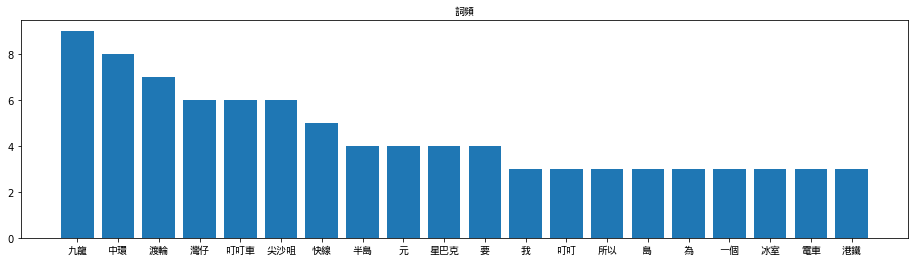

In [21]:
plt.figure(figsize=(35, 4))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

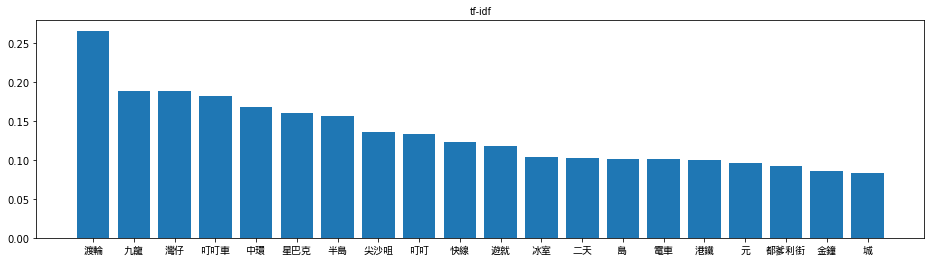

In [22]:
#修正過後
plt.figure(figsize=(35, 4))
ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")